# 라이브러리 불러오기

In [60]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# pandas options
pd.set_option('mode.copy_on_write', True)  # pandas 2.0
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7  # max number of rows to display

# NumPy options
np.set_printoptions(precision = 2, suppress=True)  # suppress scientific notation

# For high resolution display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

# 데이터 정보
## 이 데이터는 2006년 미국 뉴욕주 사라토가 카운티(Saratoga County)의 주택에 관한 정보를 담고 있습니다. 데이터셋의 형식은 데이터 프레임(data frame)이며, 총 1728개의 관측값과 16개의 변수가 있습니다. 여기에는 다음과 같은 변수가 포함되어 있습니다:


| 변수명          | 설명                               |
|----------------|------------------------------------|
| price          | 가격 (미국 달러)                   |
| lotSize        | 부지의 크기 (에이커)              |
| age            | 주택의 연식 (년)                   |
| landValue      | 토지 가치 (미국 달러)              |
| livingArea     | 거실 면적 (평방 피트)            |
| pctCollege     | 대학 졸업자 비율 (%)              |
| bedrooms       | 침실 수                           |
| fireplaces     | 벽난로 수                         |
| bathrooms      | 화장실 수 (하프 화장실은 샤워나 욕조가 없음) |
| rooms          | 방 수                             |
| heating        | 난방 시스템 종류                  |
| fuel           | 난방용 연료                       |
| sewer          | 하수도 시스템 종류                |
| waterfront     | 부동산에 해안이 포함되어 있는지 여부 |
| newConstruction | 부동산이 신축인지 여부            |
| centralAir     | 집에 중앙 에어컨이 있는지 여부     |


In [61]:
# 데이터 불러오기
houses_data = sm.datasets.get_rdataset("SaratogaHouses", "mosaicData")
houses = houses_data.data
houses.head(3)

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.00,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.50,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.00,8,hot water/steam,gas,public/commercial,No,No,No


In [62]:
# documents
print(houses_data.__doc__)

.. container::

   ============== ===============
   SaratogaHouses R Documentation
   ============== ===============

   .. rubric:: Houses in Saratoga County (2006)
      :name: SaratogaHouses

   .. rubric:: Description
      :name: description

   Data on houses in Saratoga County, New York, USA in 2006

   .. rubric:: Usage
      :name: usage

   .. code:: R

      data(SaratogaHouses)

   .. rubric:: Format
      :name: format

   A data frame with 1728 observations on the following 16 variables.

   -  ``price`` price (US dollars)

   -  ``lotSize`` size of lot (acres)

   -  ``age`` age of house (years)

   -  ``landValue`` value of land (US dollars)

   -  ``livingArea`` living are (square feet)

   -  ``pctCollege`` percent of neighborhood that graduated college

   -  ``bedrooms`` number of bedrooms

   -  ``fireplaces`` number of fireplaces

   -  ``bathrooms`` number of bathrooms (half bathrooms have no shower
      or tub)

   -  ``rooms`` number of rooms

   -  ``heating

## Q. 데이터 정보는 어떠한가?

In [63]:
# 데이터 정보 확인
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB


## Q. 데이터 요약 통계량은 어떠한가?

In [64]:
# 데이터 요약 통계량 확인
houses.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00
mean,211966.71,0.50,27.92,34557.19,1754.98,55.57,3.15,0.60,1.90,7.04
std,98441.39,0.70,29.21,35021.17,619.94,10.33,0.82,0.56,0.66,2.32
...,...,...,...,...,...,...,...,...,...,...
50%,189900.00,0.37,19.00,25000.00,1634.50,57.00,3.00,1.00,2.00,7.00
75%,259000.00,0.54,34.00,40200.00,2137.75,64.00,4.00,1.00,2.50,8.25
max,775000.00,12.20,225.00,412600.00,5228.00,82.00,7.00,4.00,4.50,12.00


# Variation (변동성, 변량, 분산도)

## Q. Continuous variable들의 분포는 어떠한가?
### Continuous 변수들의 각 분포는 아래와 같다.
#### 부지의 크기(lotSize): 0에서 1 사이의 대부분의 값 존재(약 95%)

최솟값: 0.0 최댓값: 12.2
lotSize
0.46    85
0.15    74
0.16    72
1.00    64
0.17    41
Name: count, dtype: int64


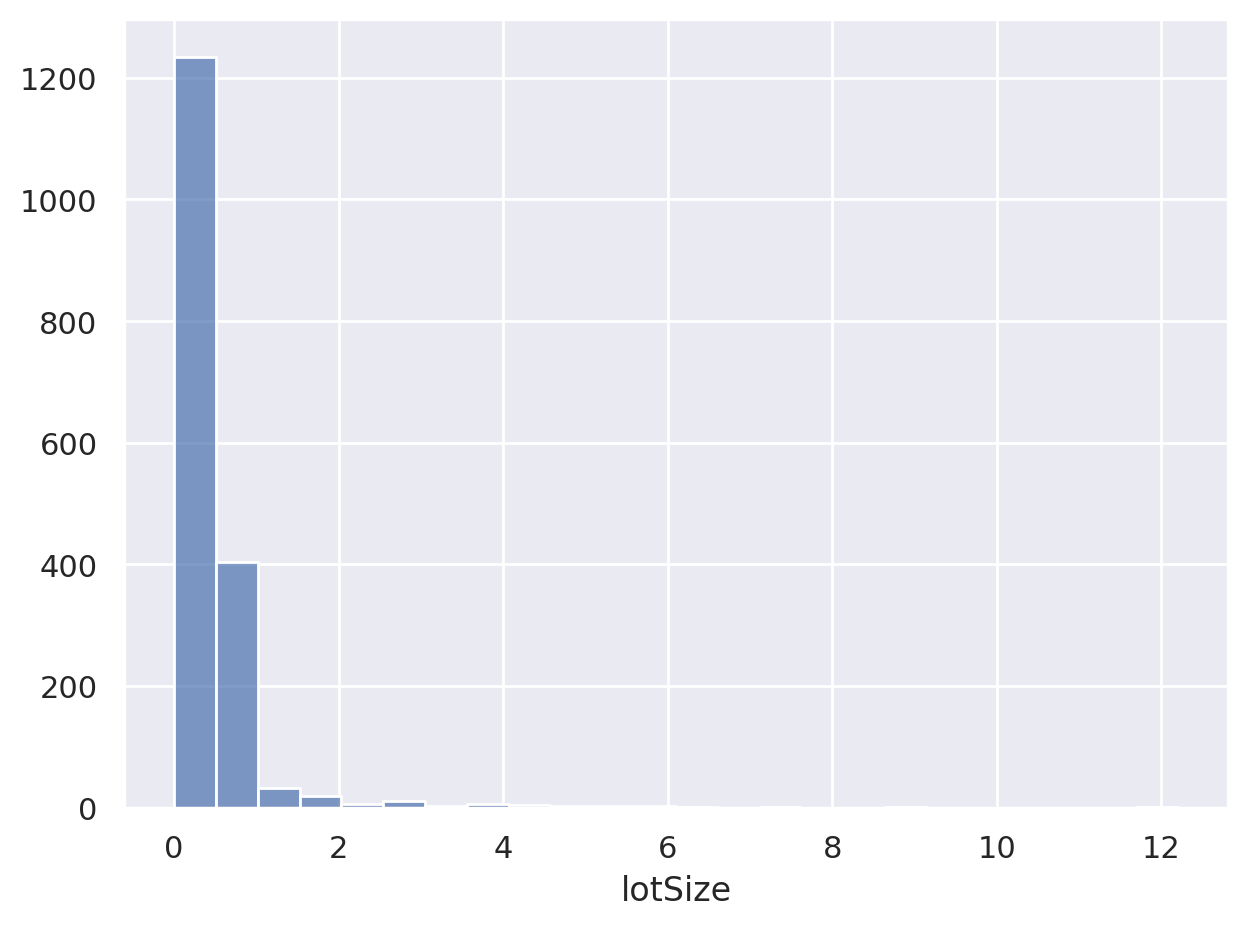

최솟값: 0 최댓값: 225
age
19    93
16    88
18    88
0     83
1     75
Name: count, dtype: int64


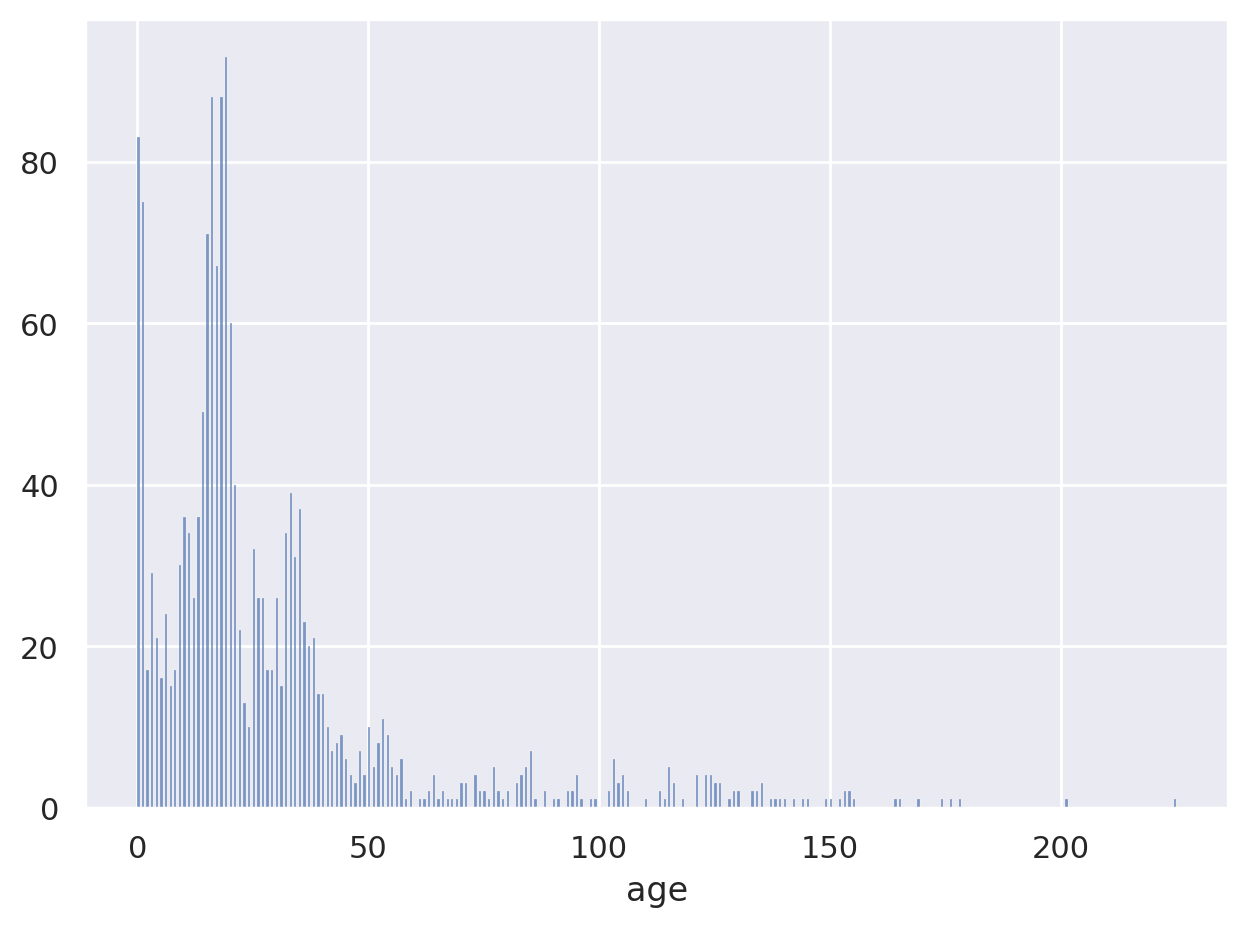

최솟값: 616 최댓값: 5228
livingArea
1480    49
912     40
2310    16
960     15
1184    14
Name: count, dtype: int64


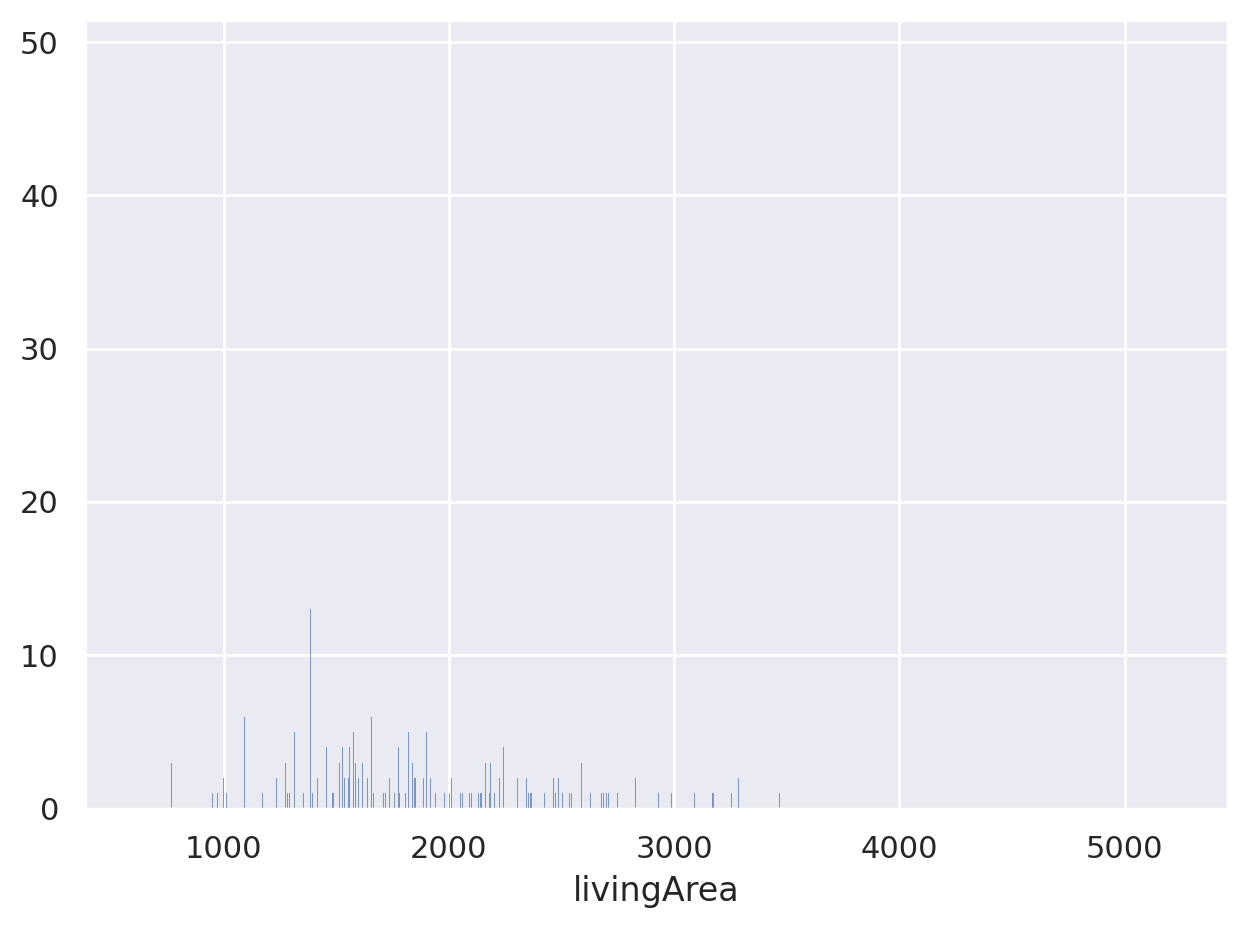

최솟값: 20 최댓값: 82
pctCollege
64    405
57    272
63    195
62    133
40    128
Name: count, dtype: int64


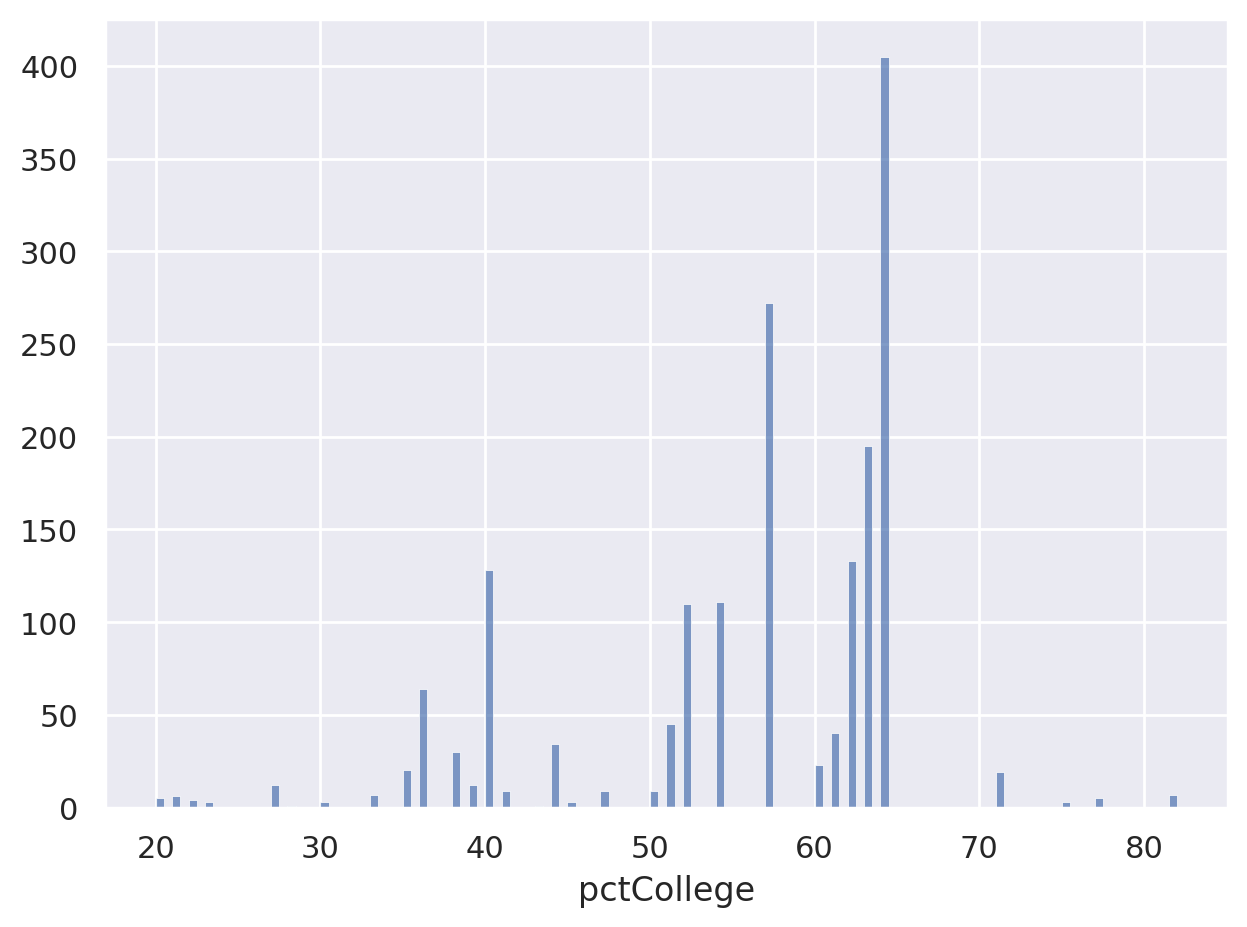

In [65]:
# Q. numeric 변수들의 분포는 어떠한가?
numeric_list = ['lotSize', 'age', 'livingArea', 'pctCollege']

for numeric in numeric_list:
    print('최솟값:', houses[numeric].min(), '최댓값:', houses[numeric].max())
    print(houses[numeric].value_counts().head())
    (
        so.Plot(houses, x = numeric)
        .add(so.Bars(), so.Hist(binwidth=.5))
    ).show()

In [66]:
# lotSzie 0에서 1 사이 값 1728개 중에서 1638개 존재
houses[houses['lotSize']<=1]

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.00,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.50,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.00,8,hot water/steam,gas,public/commercial,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,194900,0.39,9,20400,1099,51,2,0,1.00,3,hot air,gas,public/commercial,No,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.00,7,hot air,gas,public/commercial,No,No,No
1727,111300,0.59,86,26000,1959,51,3,0,1.00,6,hot air,gas,septic,No,No,No


## Q.  Categorical variable의 분포는 어떠한가?
### A. 각 categorical 변수들의 분포는 아래와 같다.
#### 침실 수(bedrooms): 3개 822 / 4개 487 / 2개 348 / 5개 53
#### 벽난로 수(fireplaces): 1개 942 / 0개 740 / 2개 42 / 4개 2 / 3개 2
#### 화장실 수(bathrooms): 2.50개 549 / 1.50개 497 /1.00개 325 / 2.00개 255 / 3.00개 56
#### 방 수(rooms): 7개 305 / 8개 258 / 6개 247 / 5개 223 / 4개 181
#### 난방 시스템 종류(heating): hot air 1121 / electric 305 / hot water,steam 302
#### 난방용 연료(fuel): gas 1197 / electric 315 / oil 216
#### 하수도 시스템 종류(sewer): public,commercial 1213 / septic 503 / none 12
#### 부동산에 해안이 포함되어 있는지 여부(waterfront): No 1713 / Yes 15
#### 부동산이 신축인지 여부(newConstruction): No 1647 / Yes 81
#### 집에 중앙 에어컨이 있는지 여부(CentralAir): No 1093 / Yes 635

bedrooms
3    822
4    487
2    348
5     53
6      8
Name: count, dtype: int64


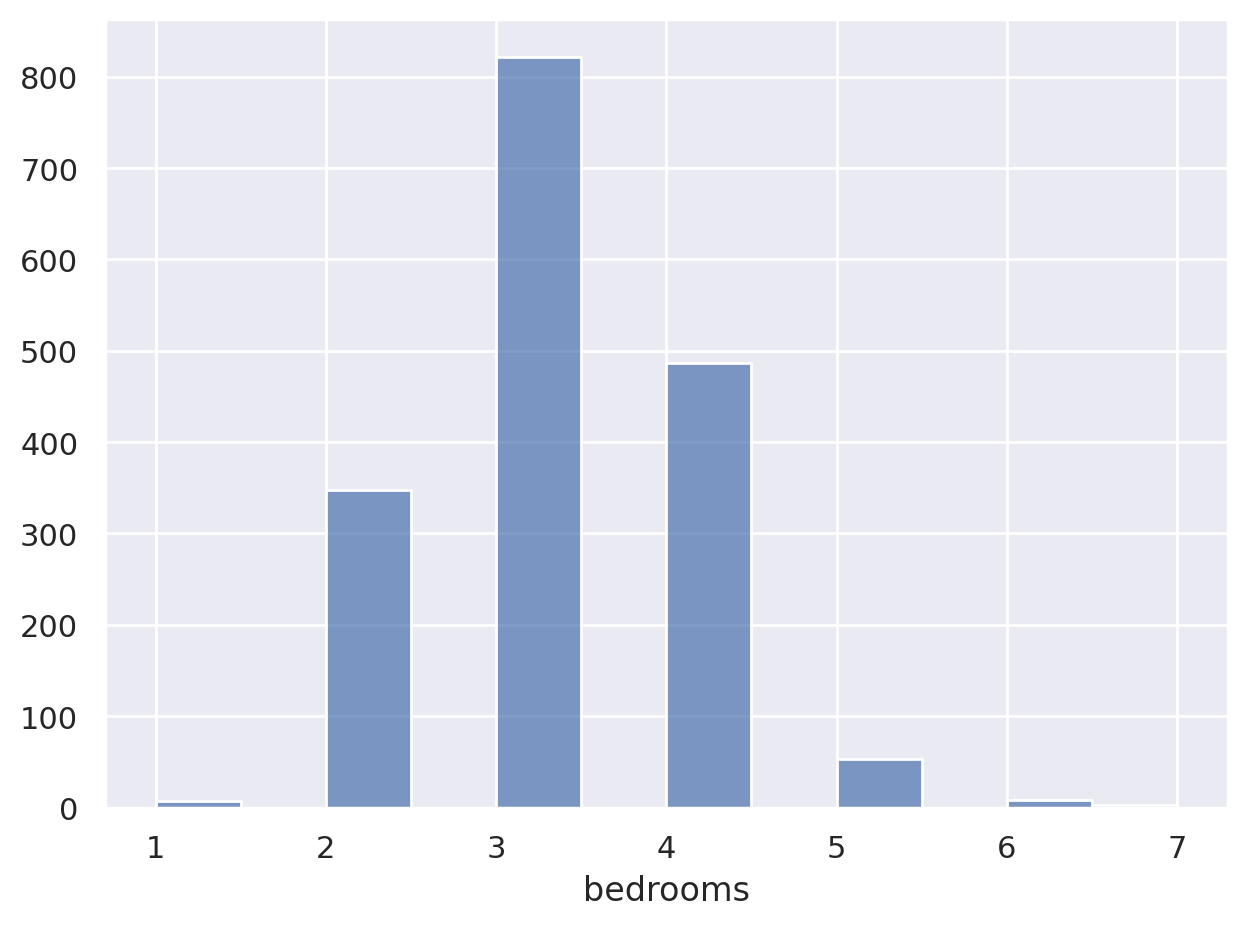

fireplaces
1    942
0    740
2     42
4      2
3      2
Name: count, dtype: int64


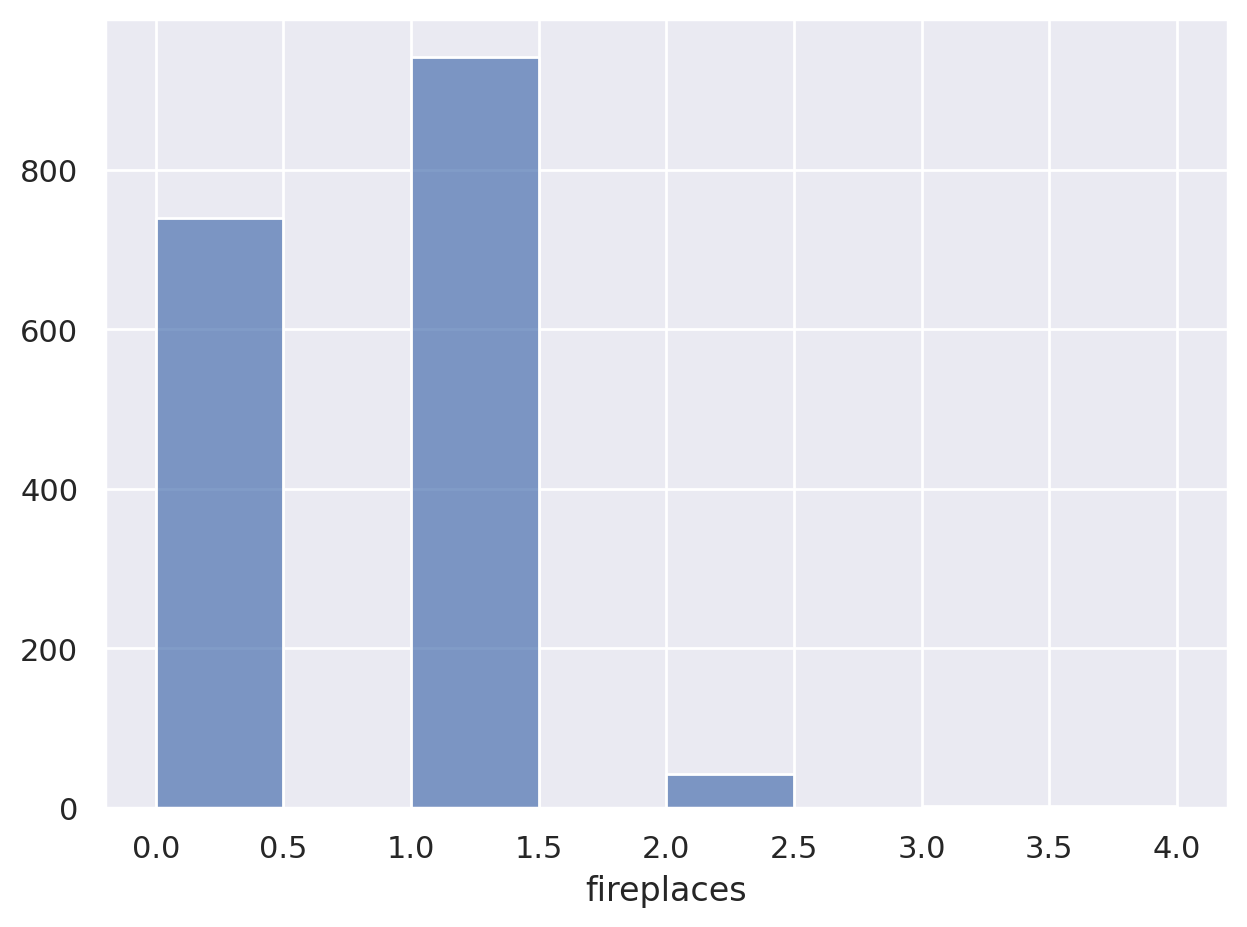

bathrooms
2.50    549
1.50    497
1.00    325
2.00    255
3.00     56
Name: count, dtype: int64


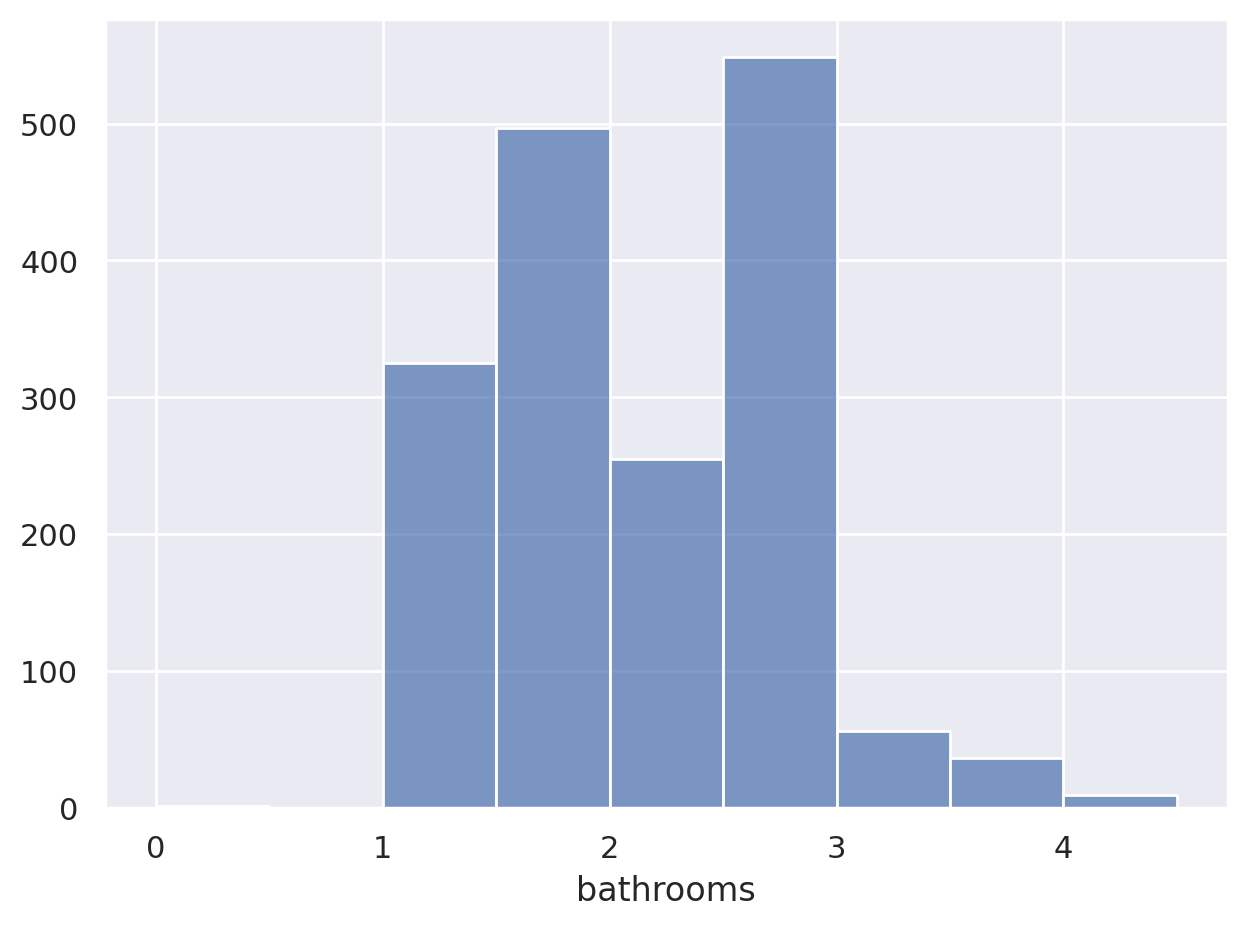

rooms
7    305
8    258
6    247
5    223
4    181
Name: count, dtype: int64


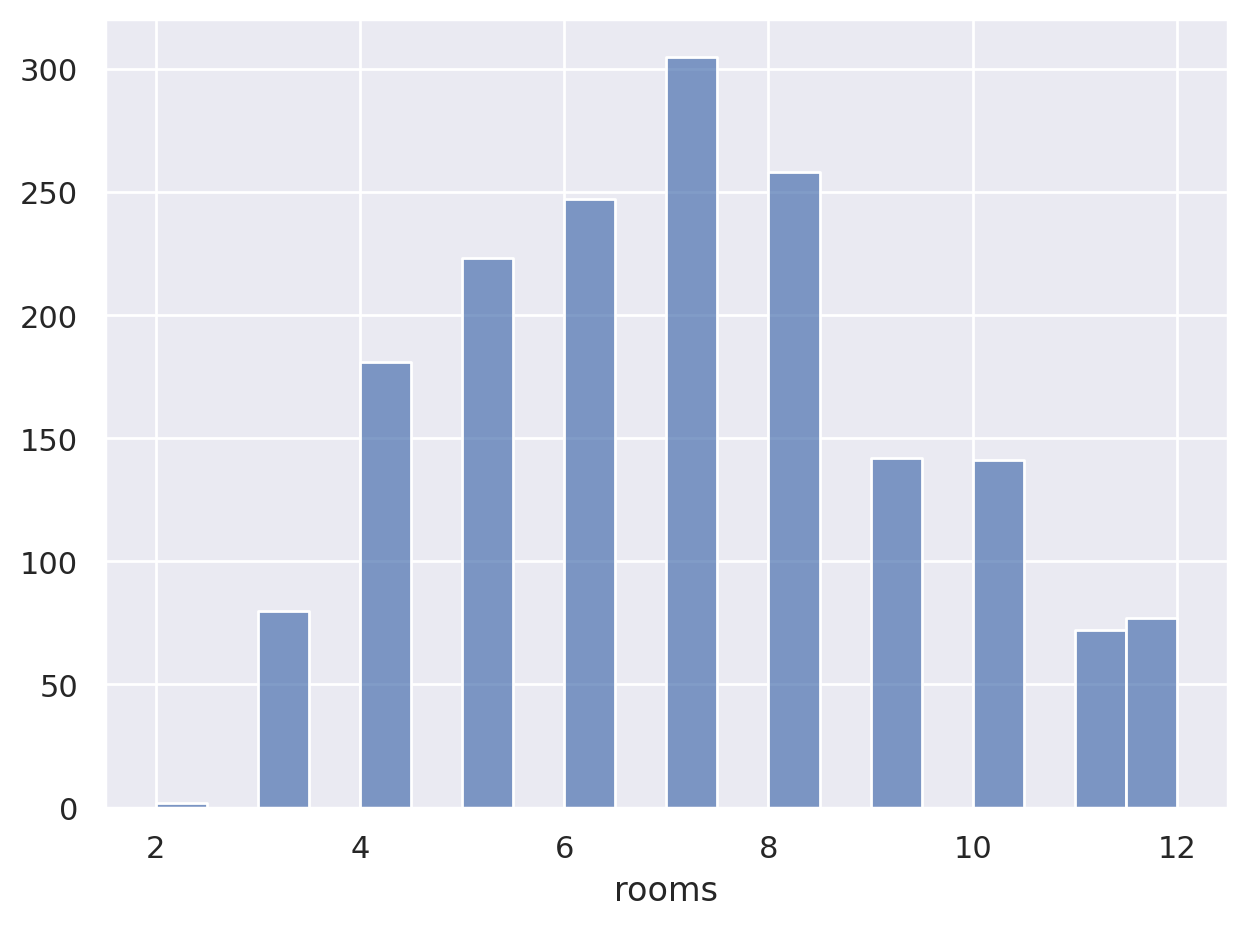

heating
hot air            1121
electric            305
hot water/steam     302
Name: count, dtype: int64


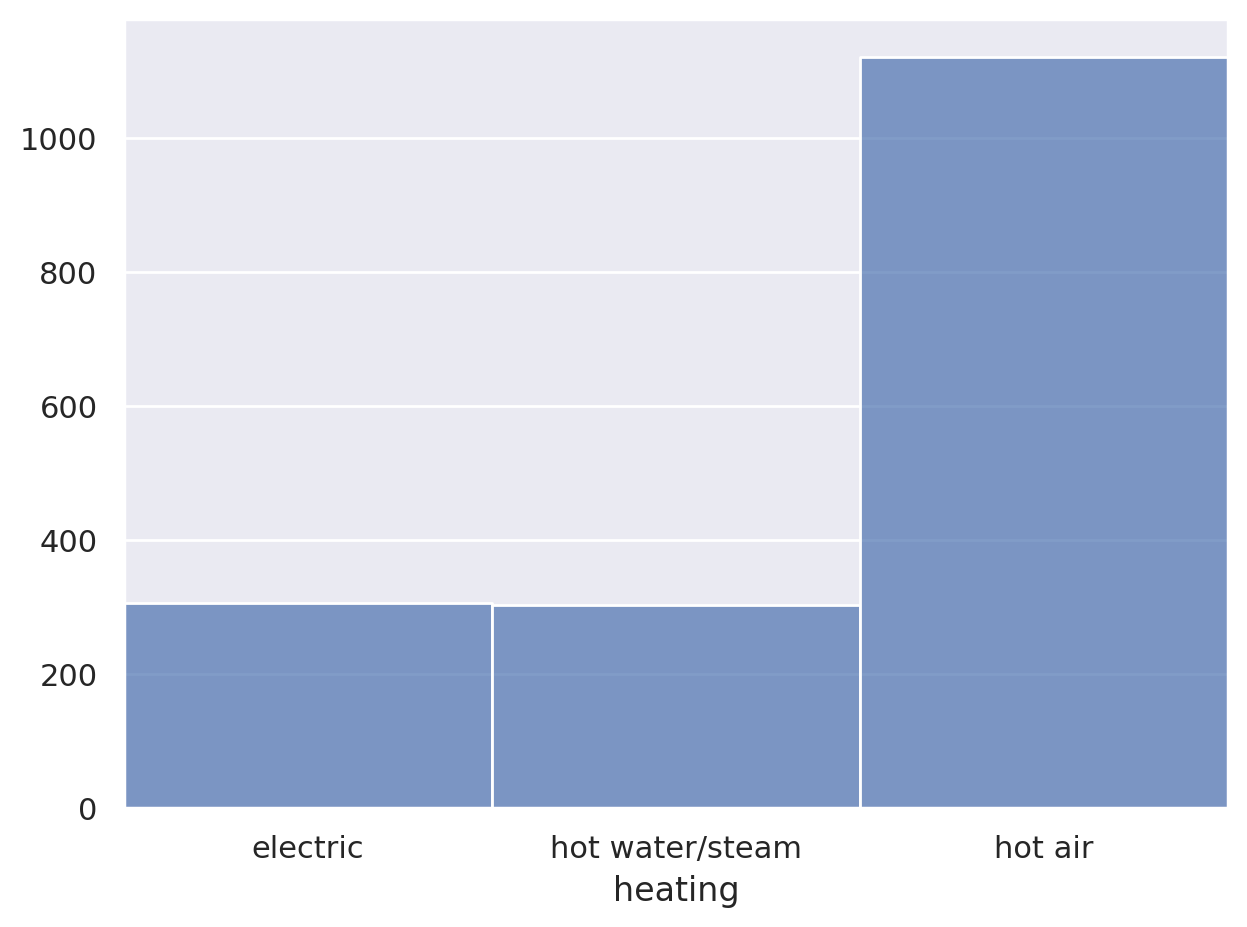

fuel
gas         1197
electric     315
oil          216
Name: count, dtype: int64


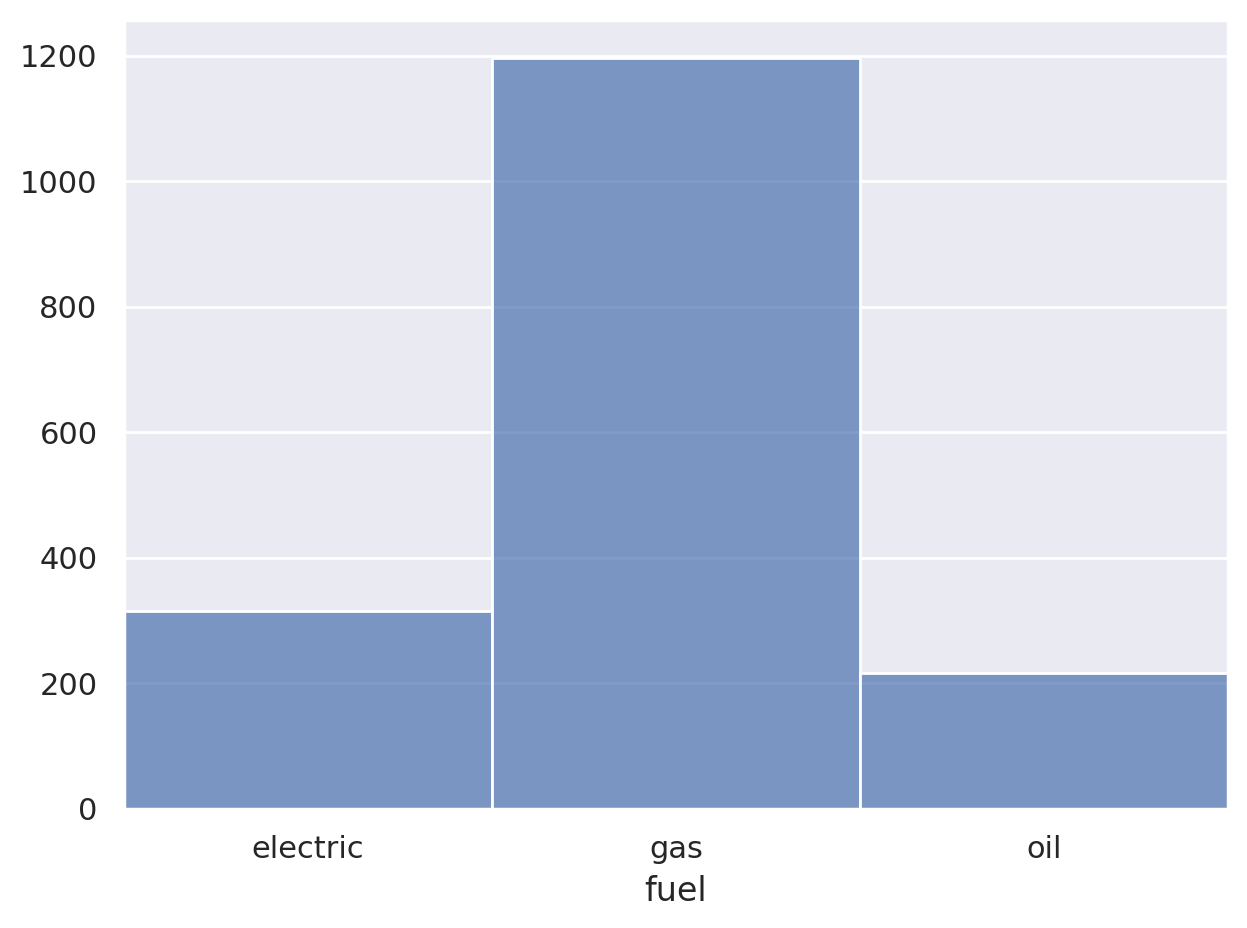

sewer
public/commercial    1213
septic                503
none                   12
Name: count, dtype: int64


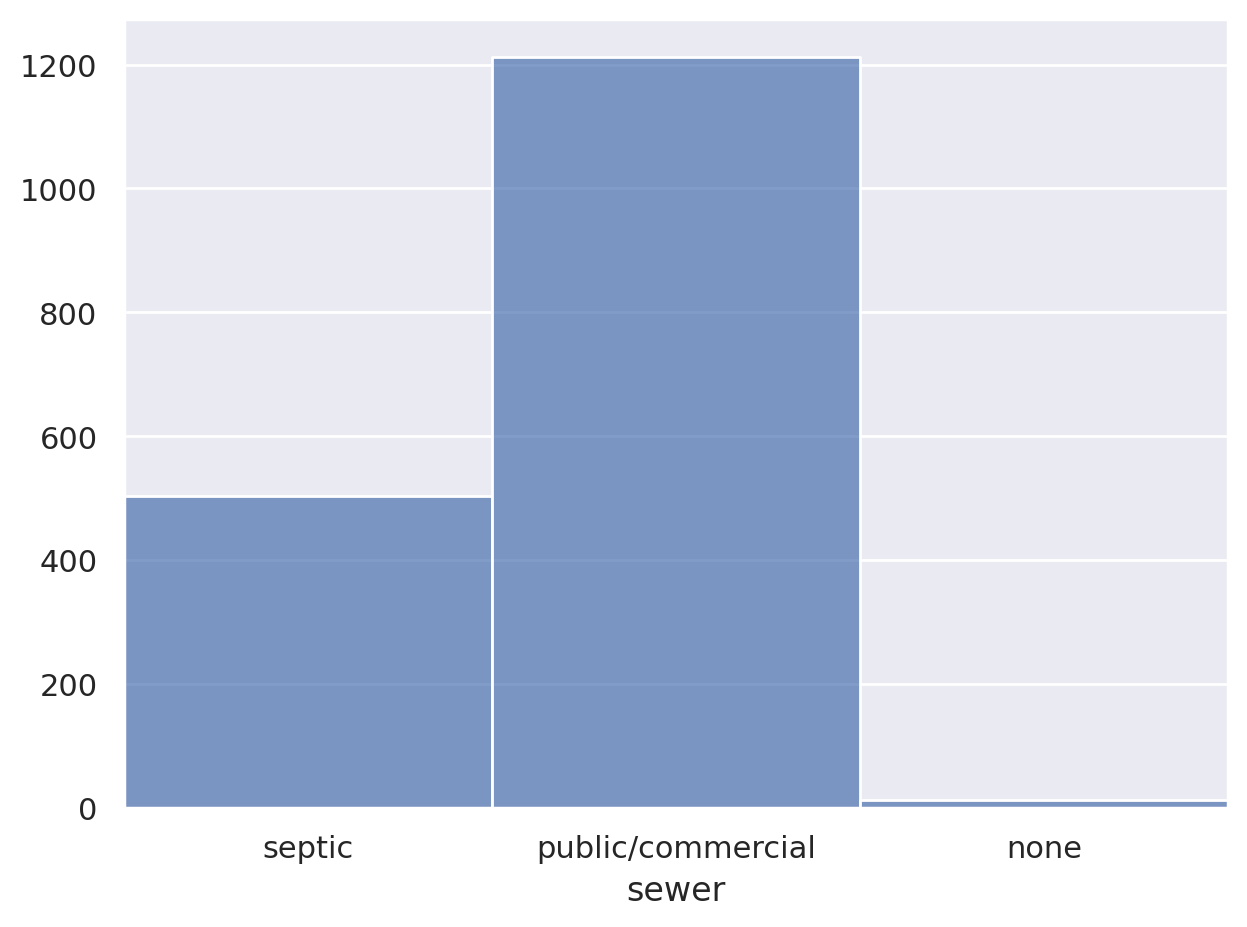

waterfront
No     1713
Yes      15
Name: count, dtype: int64


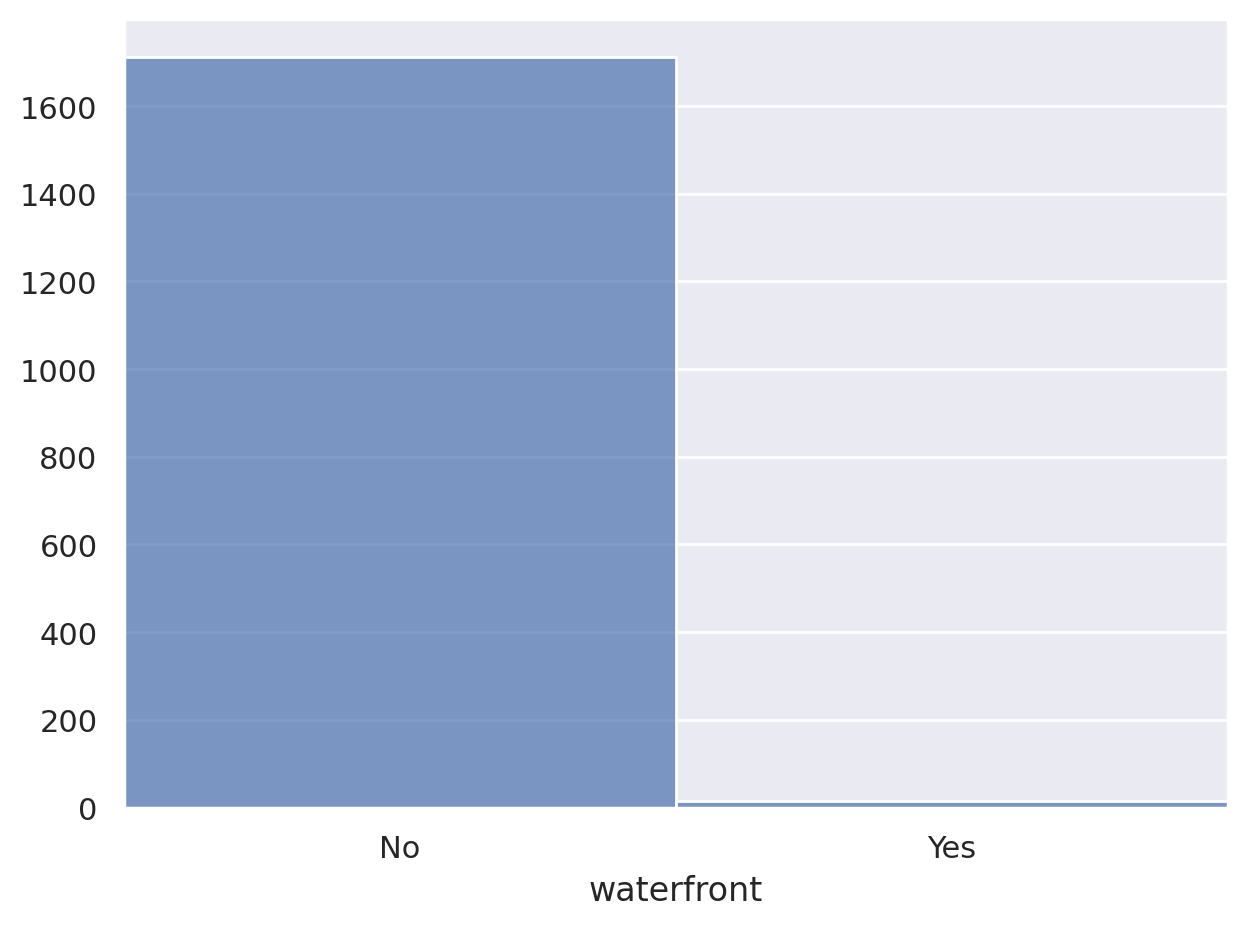

newConstruction
No     1647
Yes      81
Name: count, dtype: int64


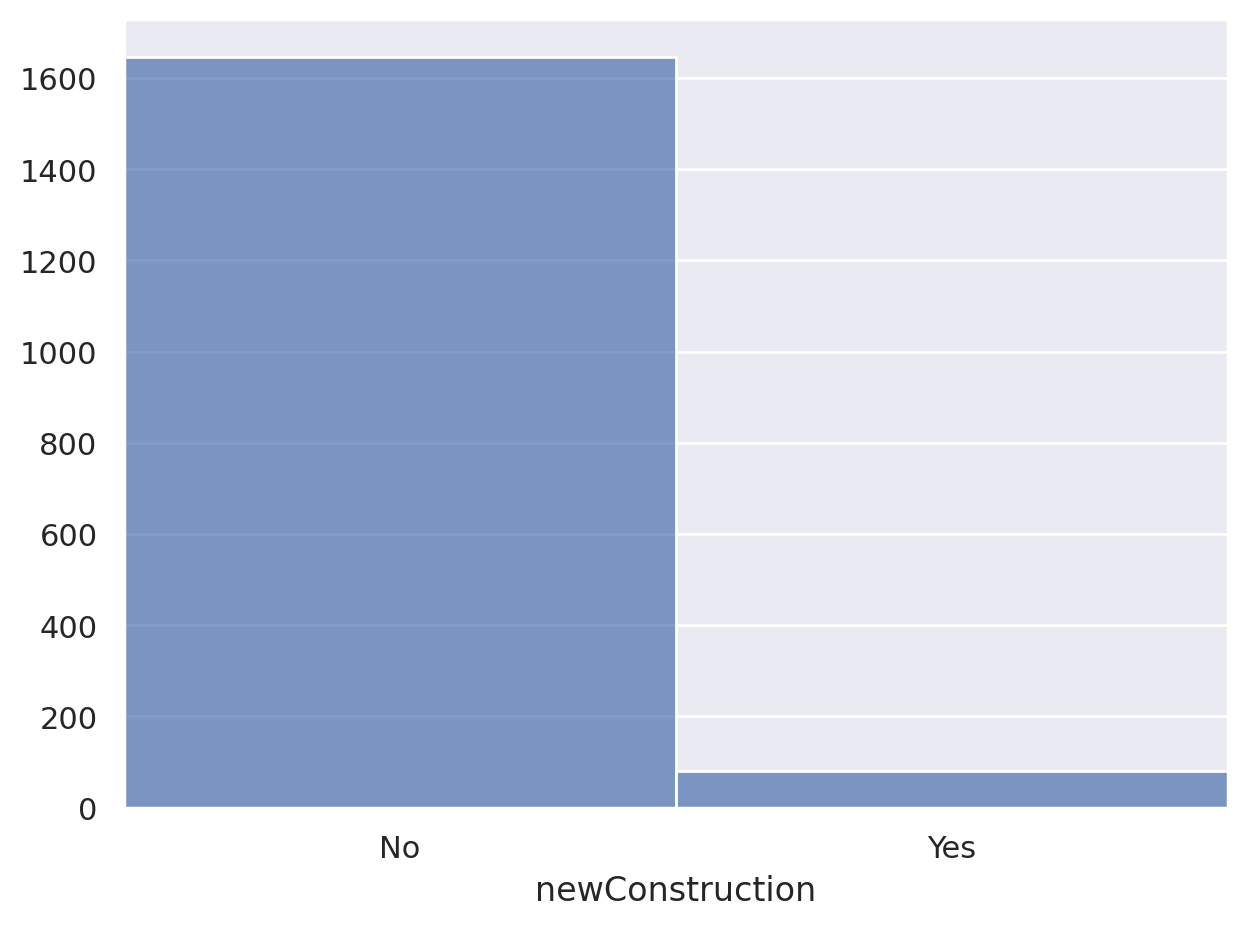

centralAir
No     1093
Yes     635
Name: count, dtype: int64


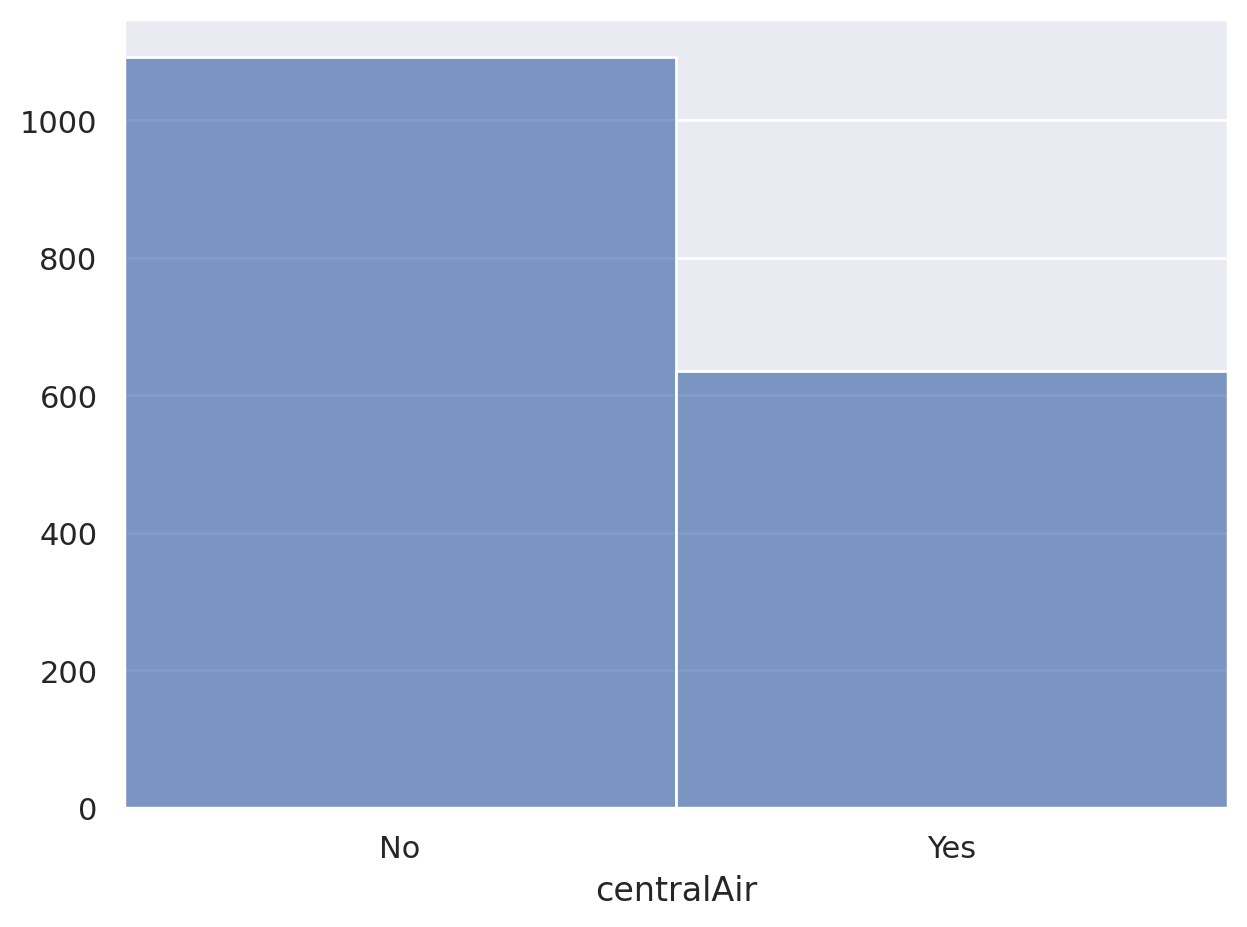

In [67]:
categorical_list = ['bedrooms', 'fireplaces', 'bathrooms', 'rooms', 'heating', 'fuel', 'sewer', 'waterfront', 'newConstruction', 'centralAir']

for categorical in categorical_list:
    print(houses[categorical].value_counts().head())
    (
        so.Plot(houses, x = categorical)
        .add(so.Bars(), so.Hist(binwidth=.5))
    ).show()

# Covariation (공변성, 공분산도)

## Q. Continuous variable과 가격(price)는 어떤 관계가 있는가?
### A. 거실 면적(livingArea)는 price와 선형 관계가 있음을 확인할 수 있다.

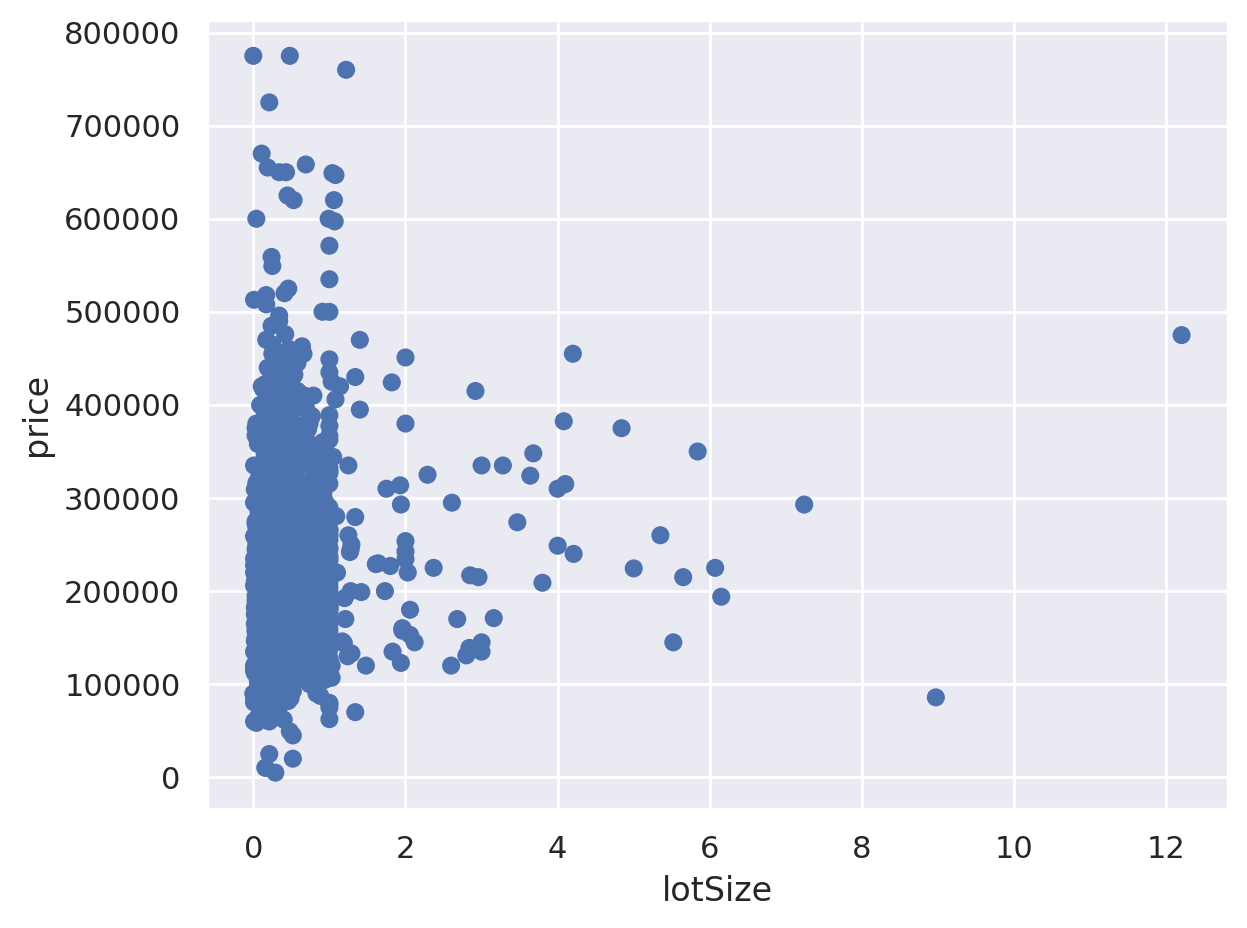

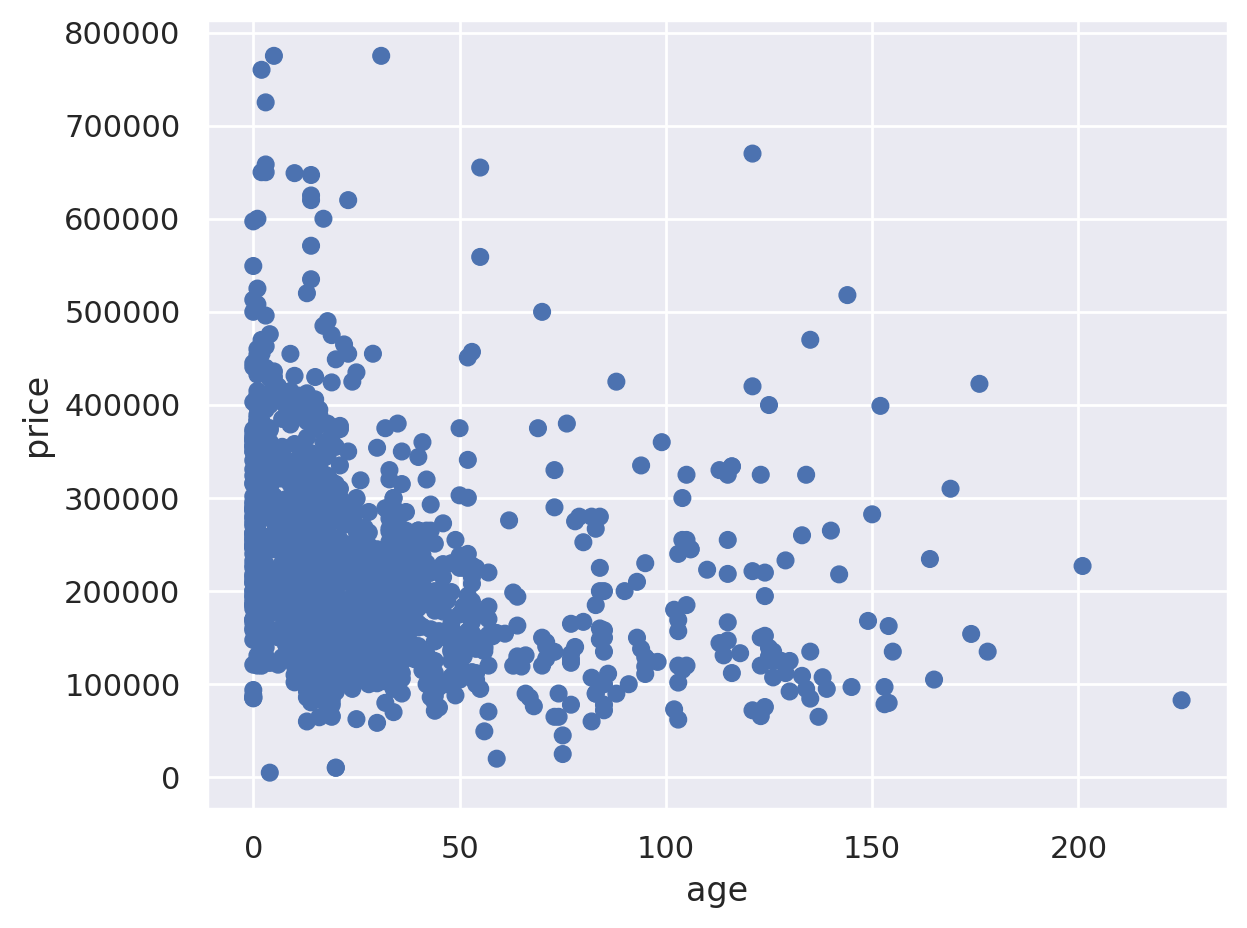

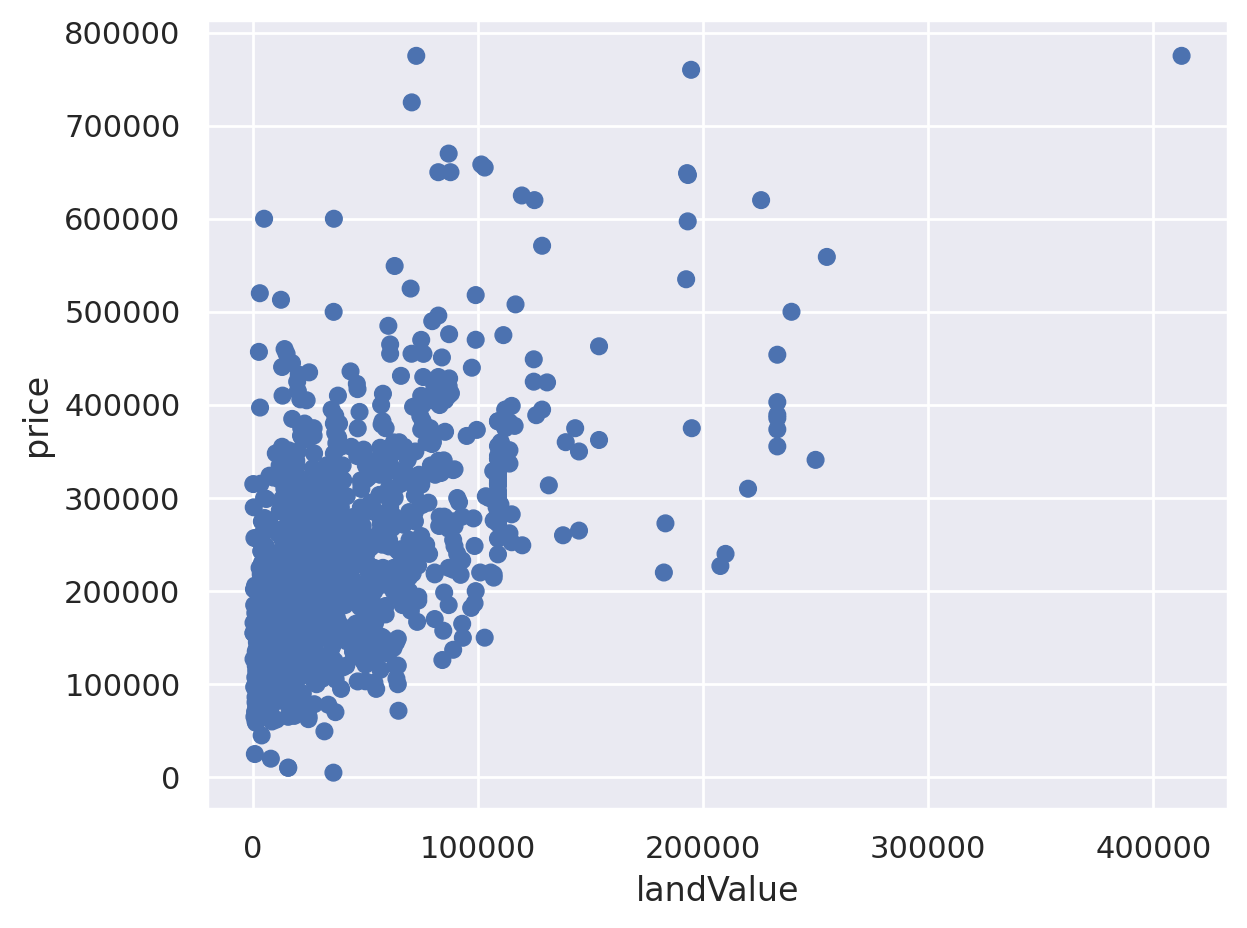

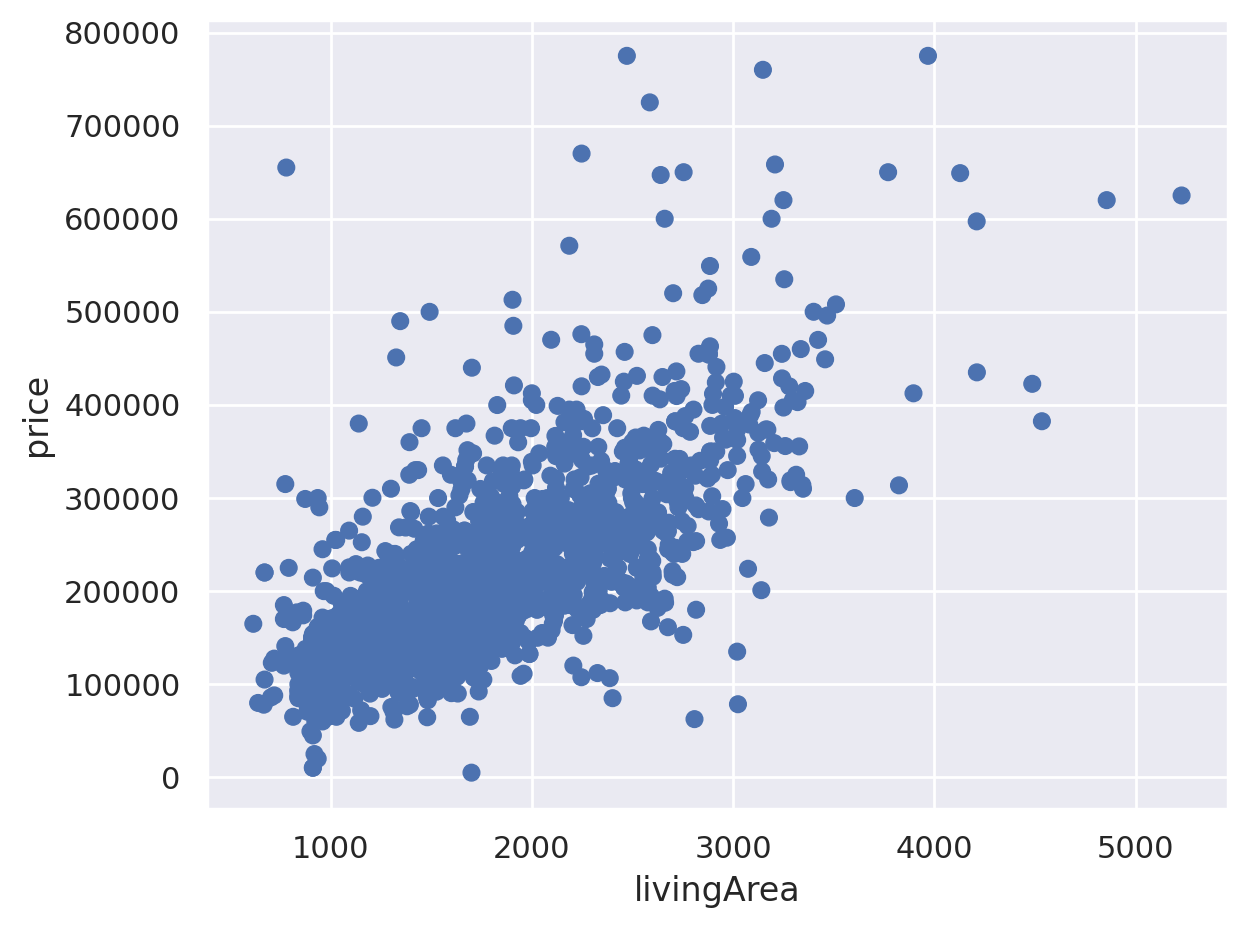

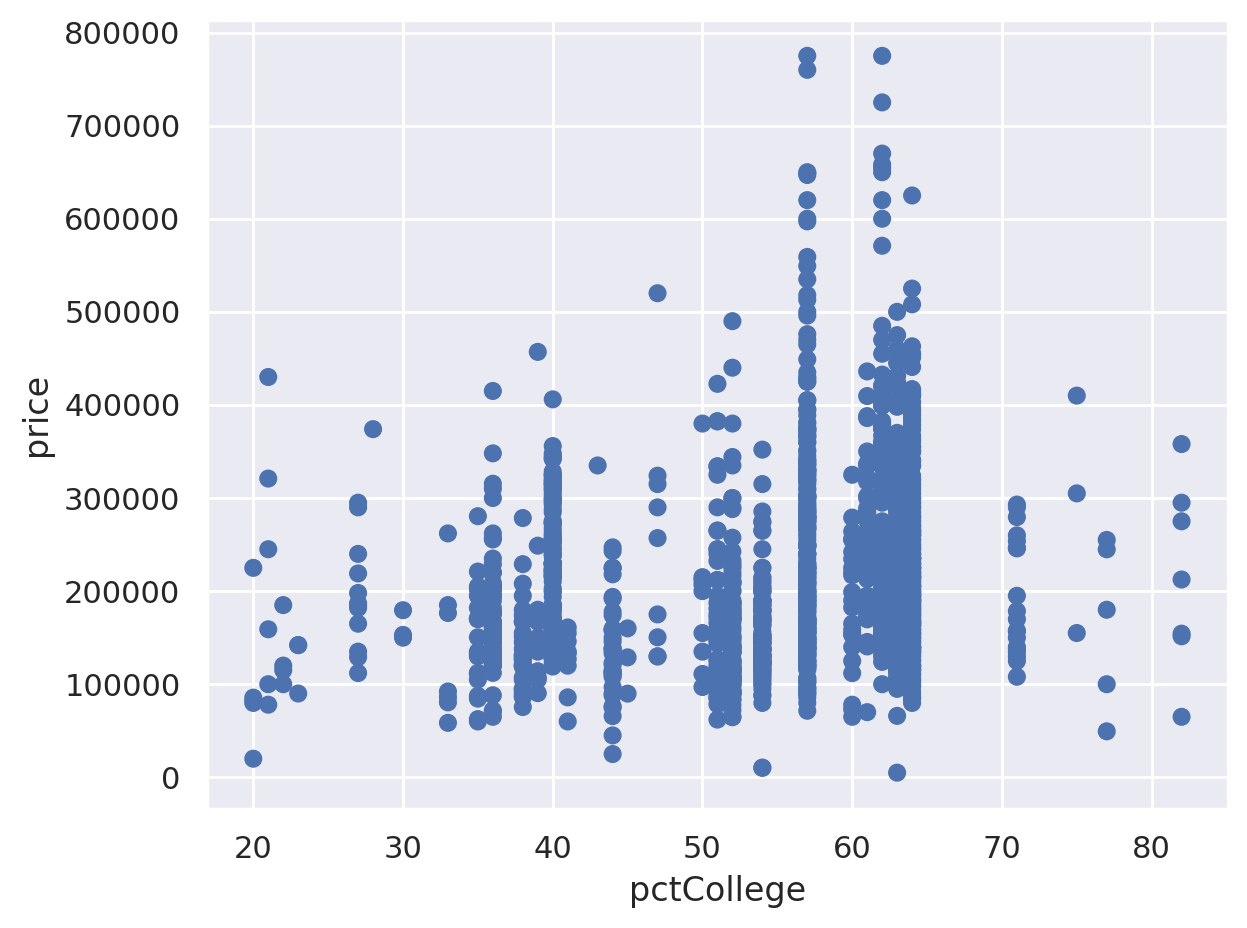

In [68]:
# Q. numeric 변수과 가격(price)는 어떤 관계가 있는가?
numeric_list = ['lotSize', 'age', 'landValue', 'livingArea', 'pctCollege']

for numeric in numeric_list:
    (
    so.Plot(houses, x=numeric, y="price")
    .add(so.Dot())
    ).show()

## Q.  Categorical variable과 가격(price)는 어떤 관계가 있는가?
### 1. bedrooms, fireplaces, bathrooms, rooms과 같이, 순서가 의미있는 경우에 대체로 개수가 많을수록 price가 커지는 걸 확인할 수 있다.
### 2. 난방용 연료(fuel)에서 gas > oil > electric 순으로 평균이 높고, 난방 시스템 종류(heating) hot air > hot water/steam > electric 순으로 평균이 높다. ---> fuel, heating 변수에서 보인 것처럼, electric을 사용하는 경우 가격이 낮다고 판단할 수 있다.
### 3. 하수도 시스템(sewer)의 경우, None 값이 12개 있는데 이에 해당하는 경우가 평균 price가 더 높다. 그리고 공공하수도(public)인 경우가 더 가격이 높은 걸 확인할 수 있다.

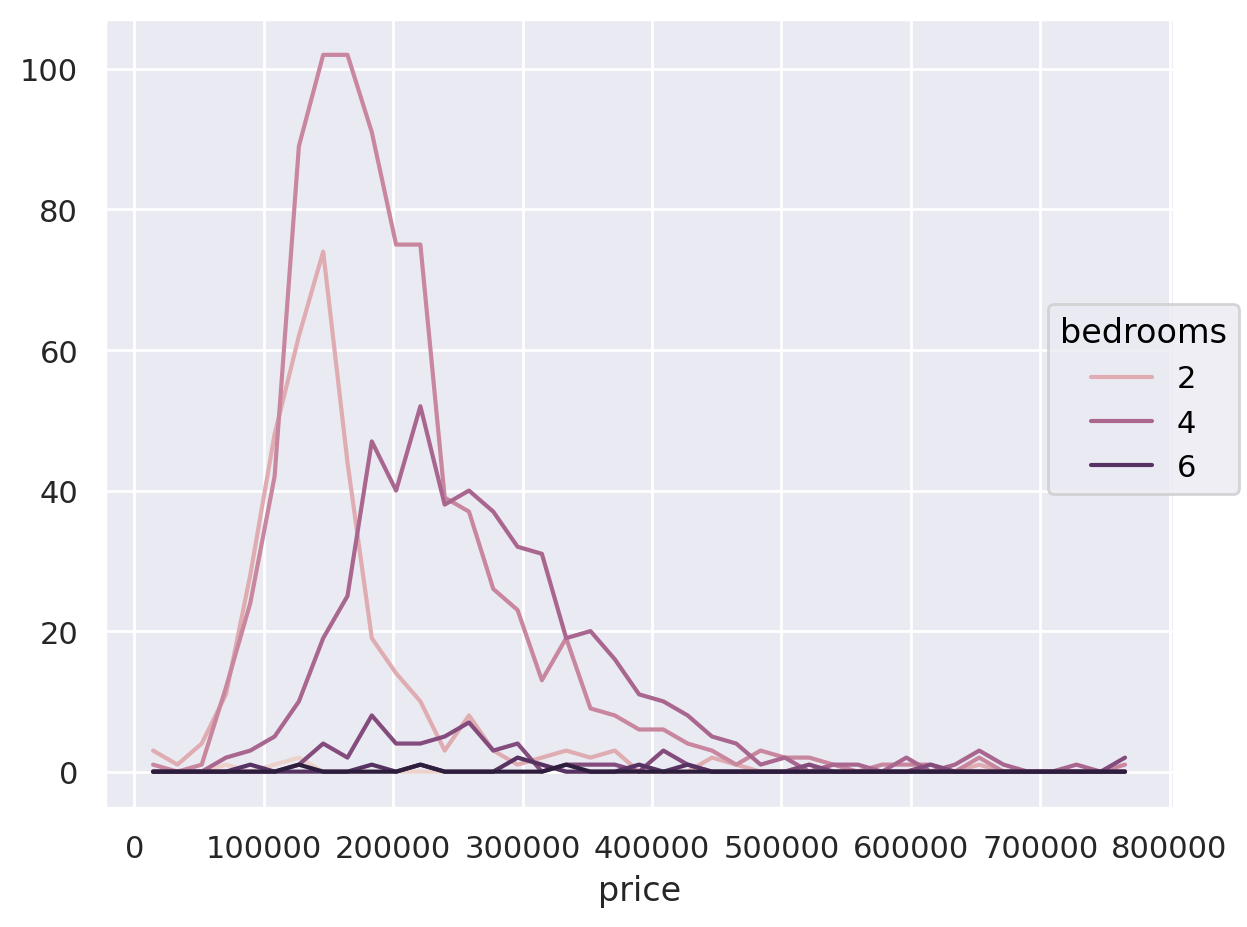

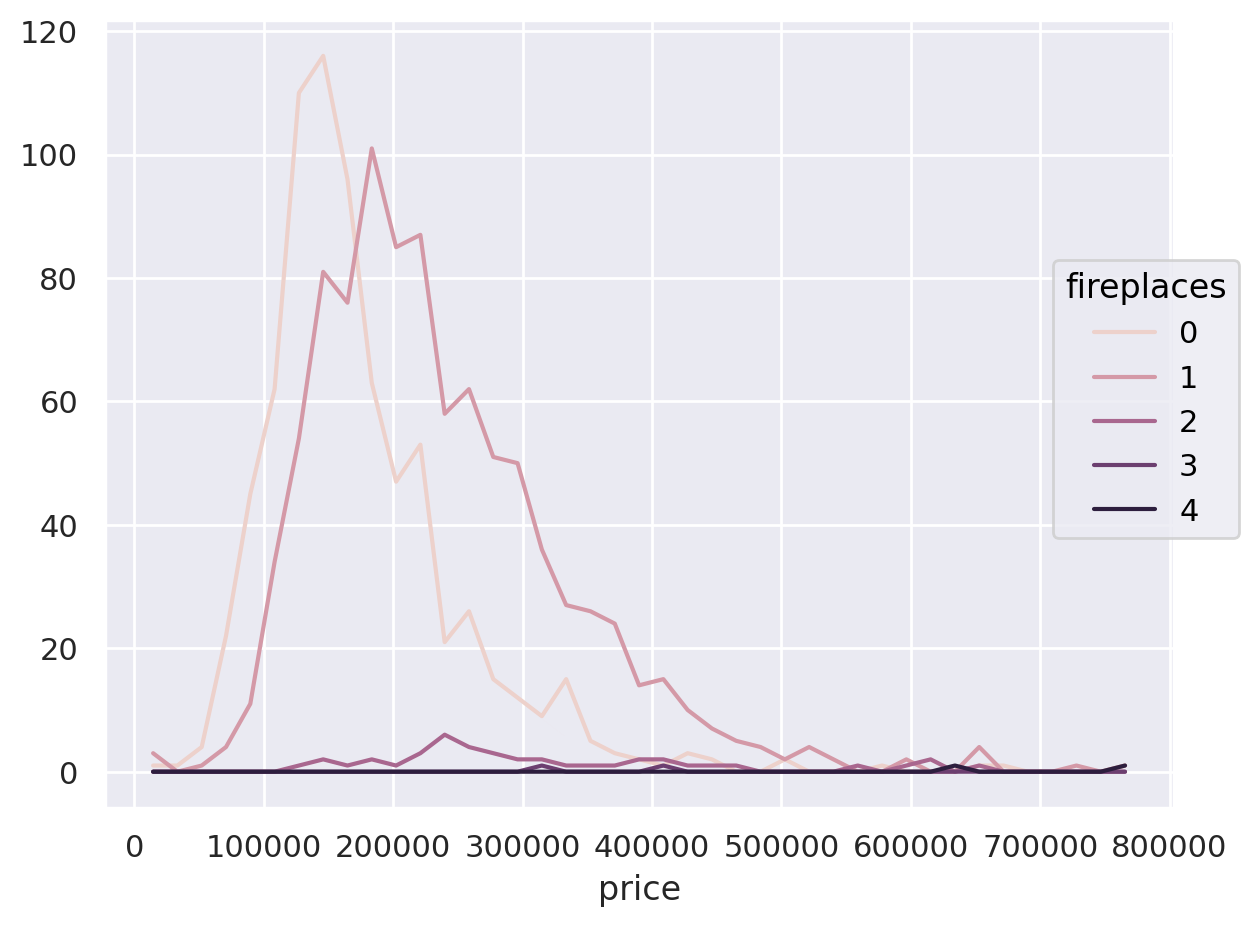

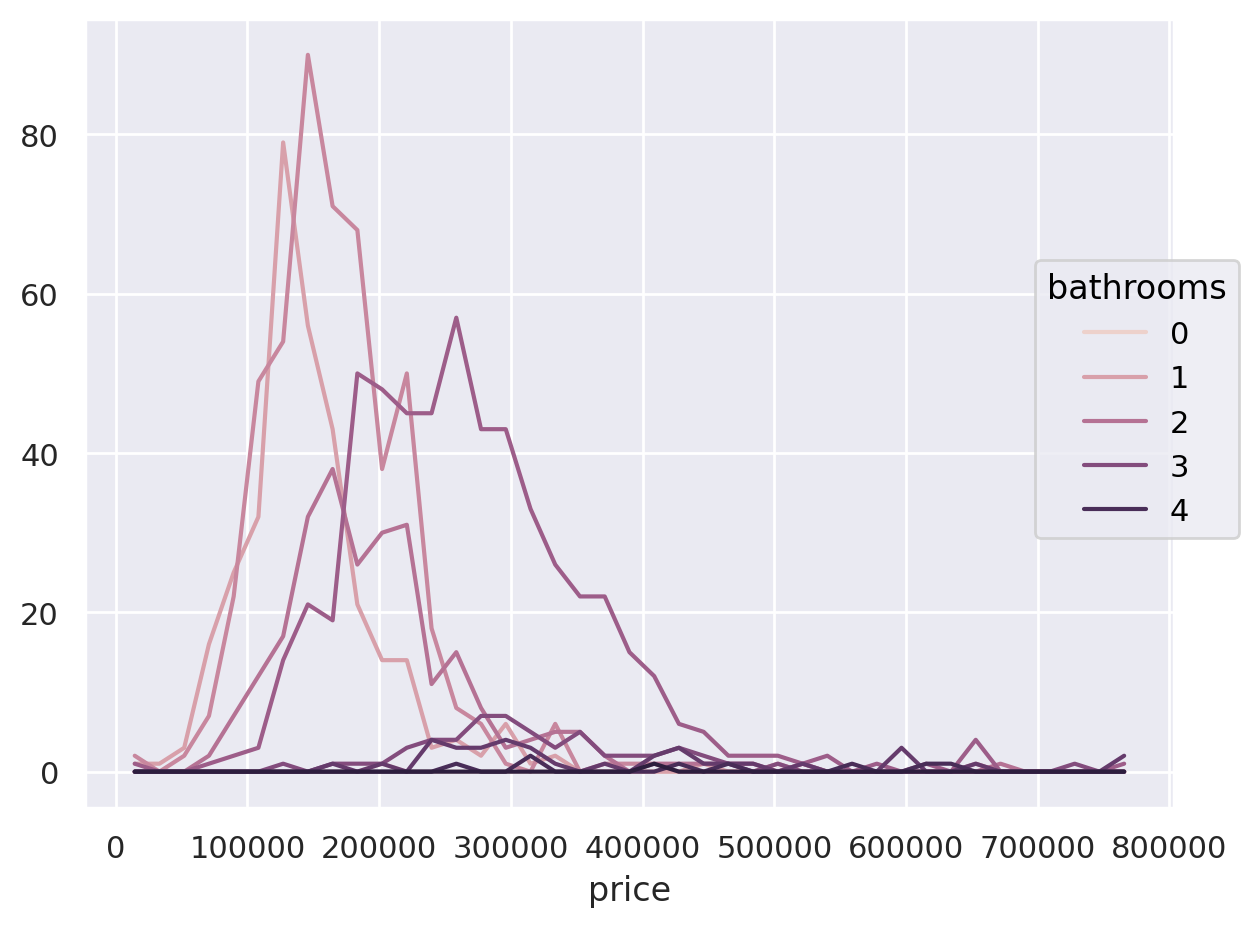

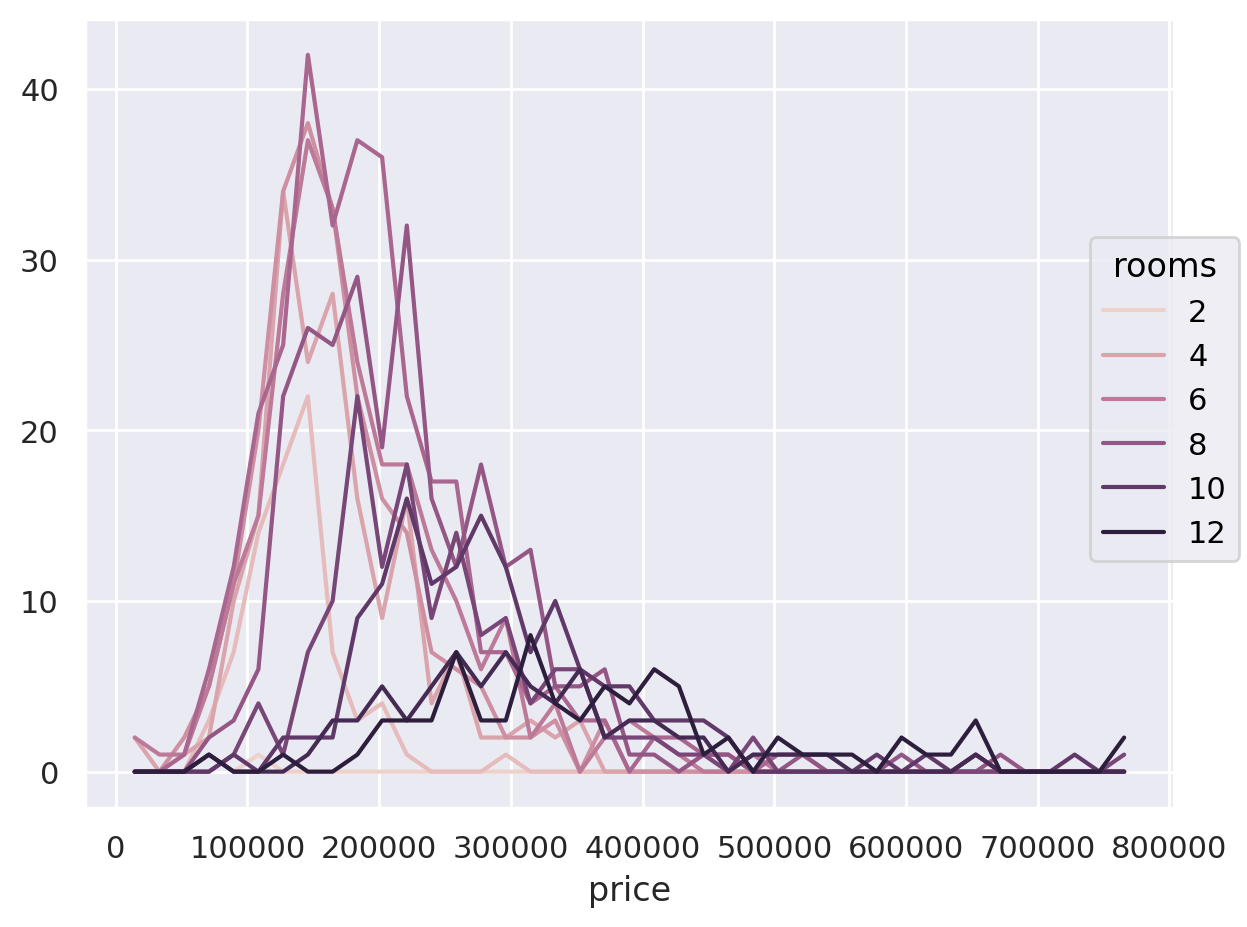

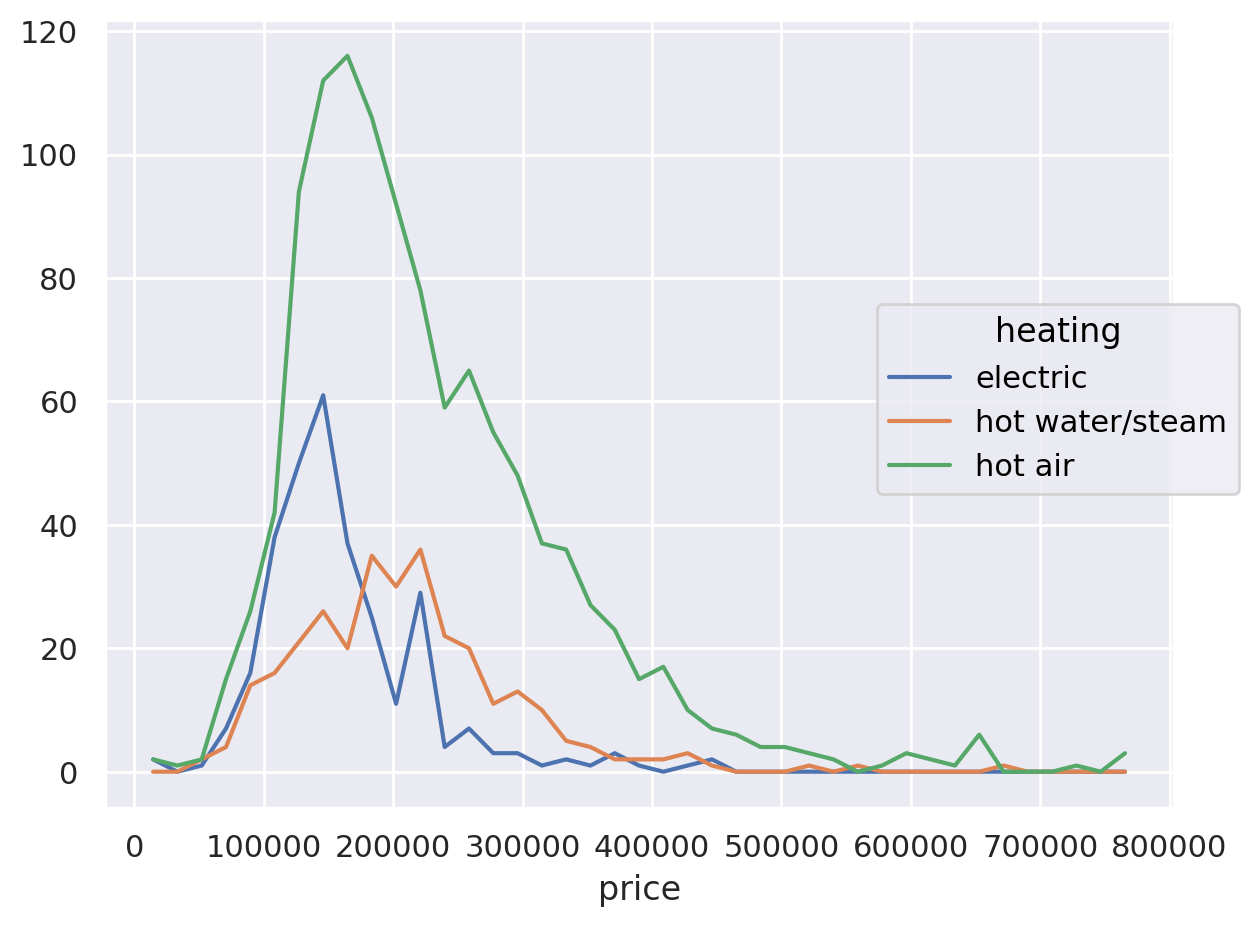

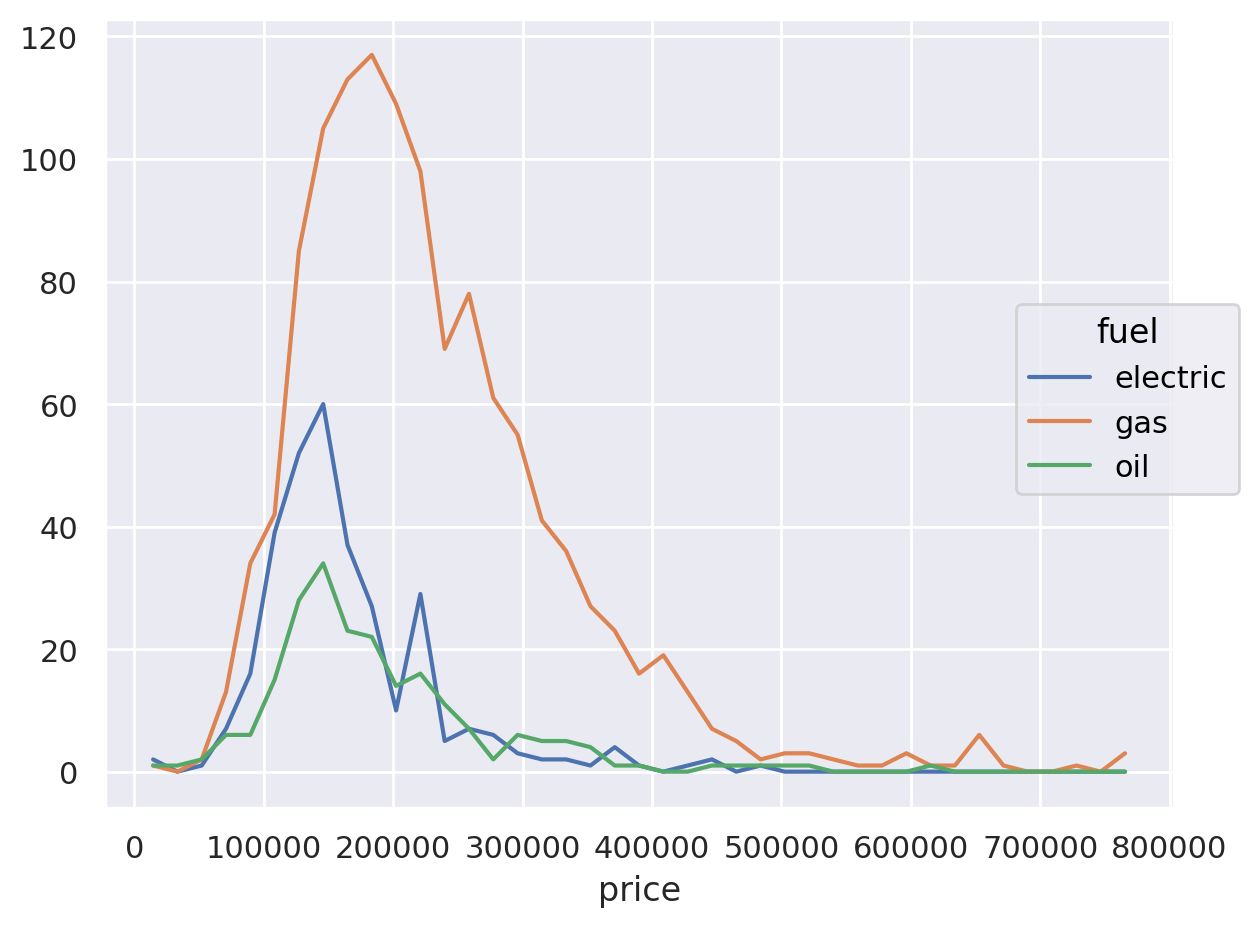

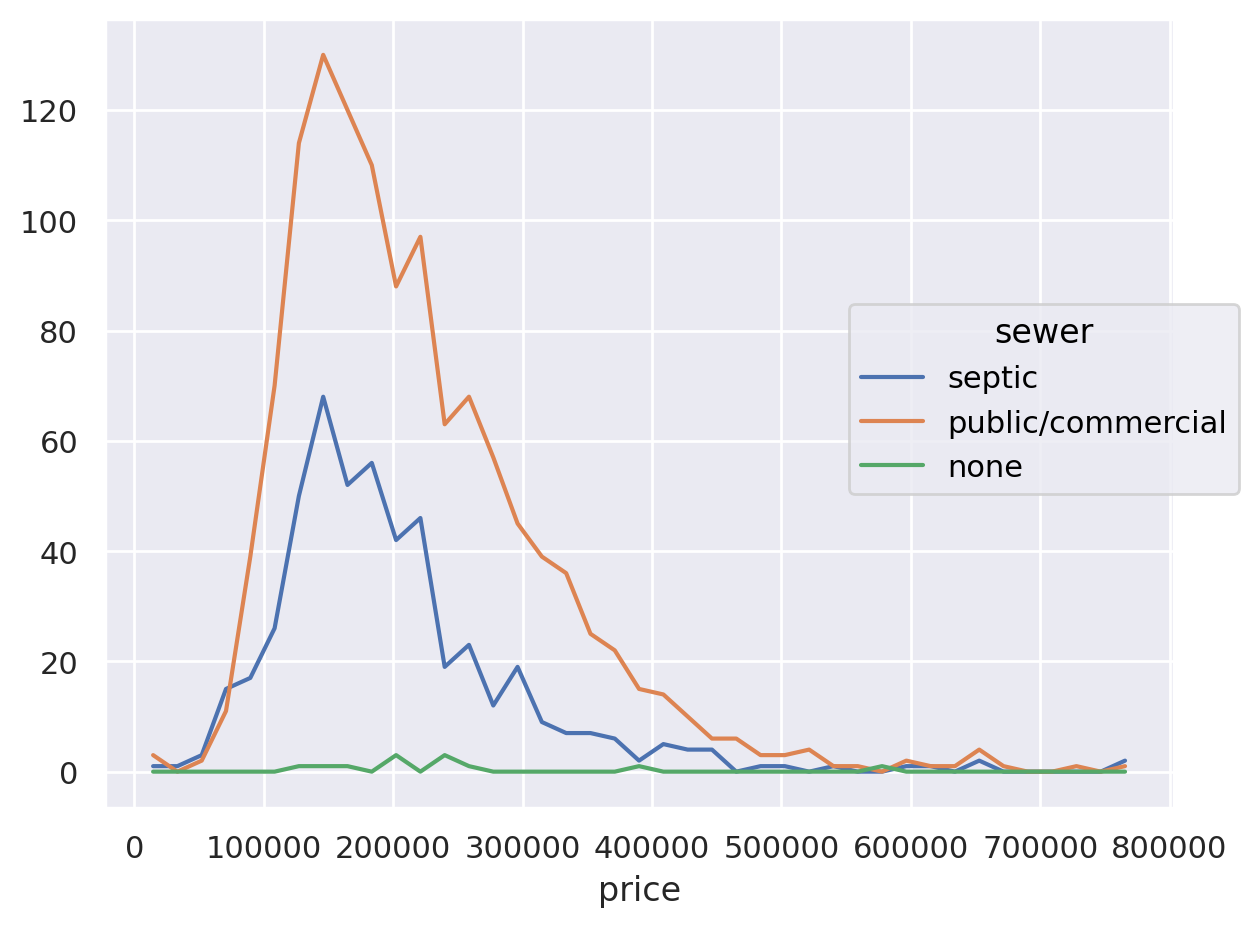

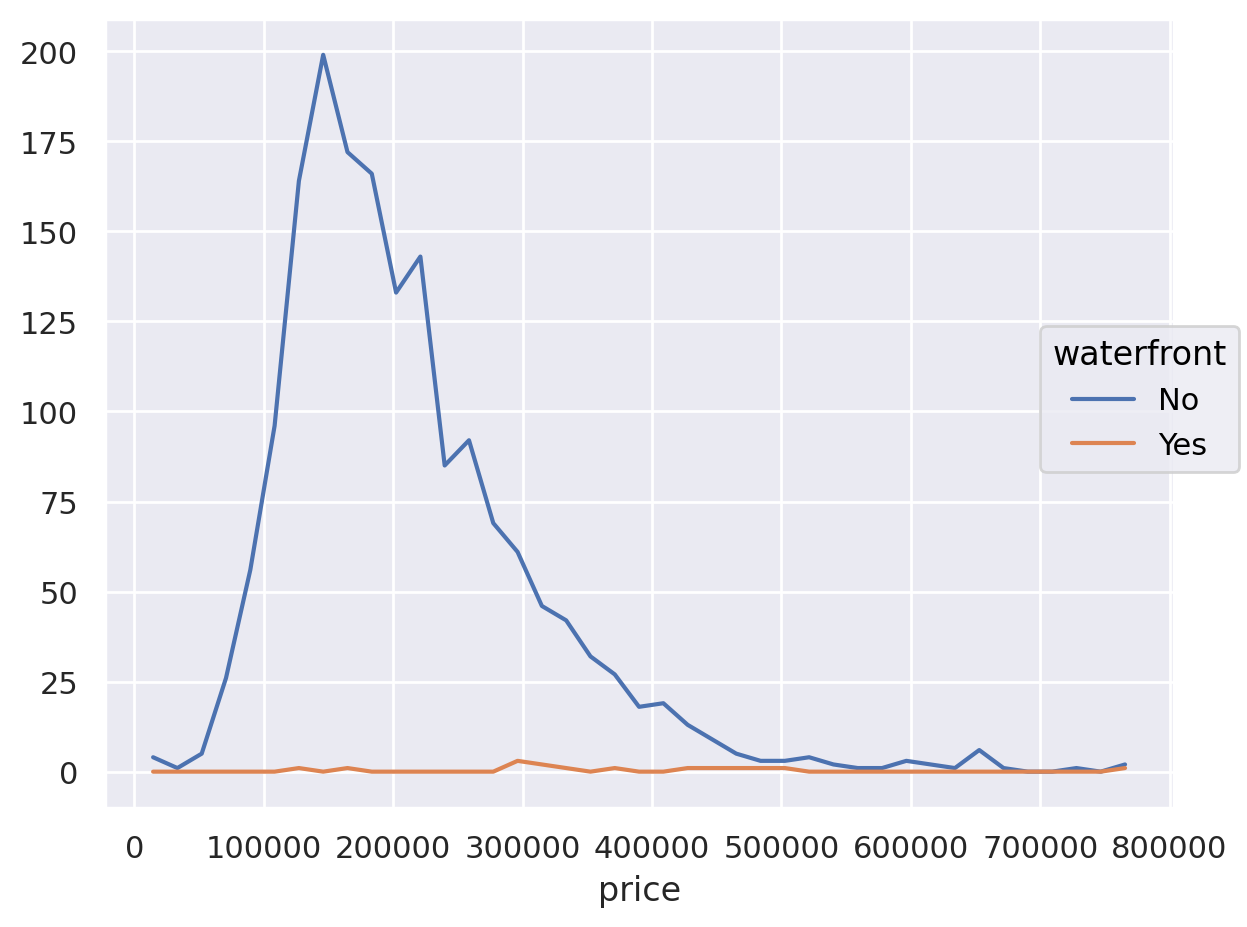

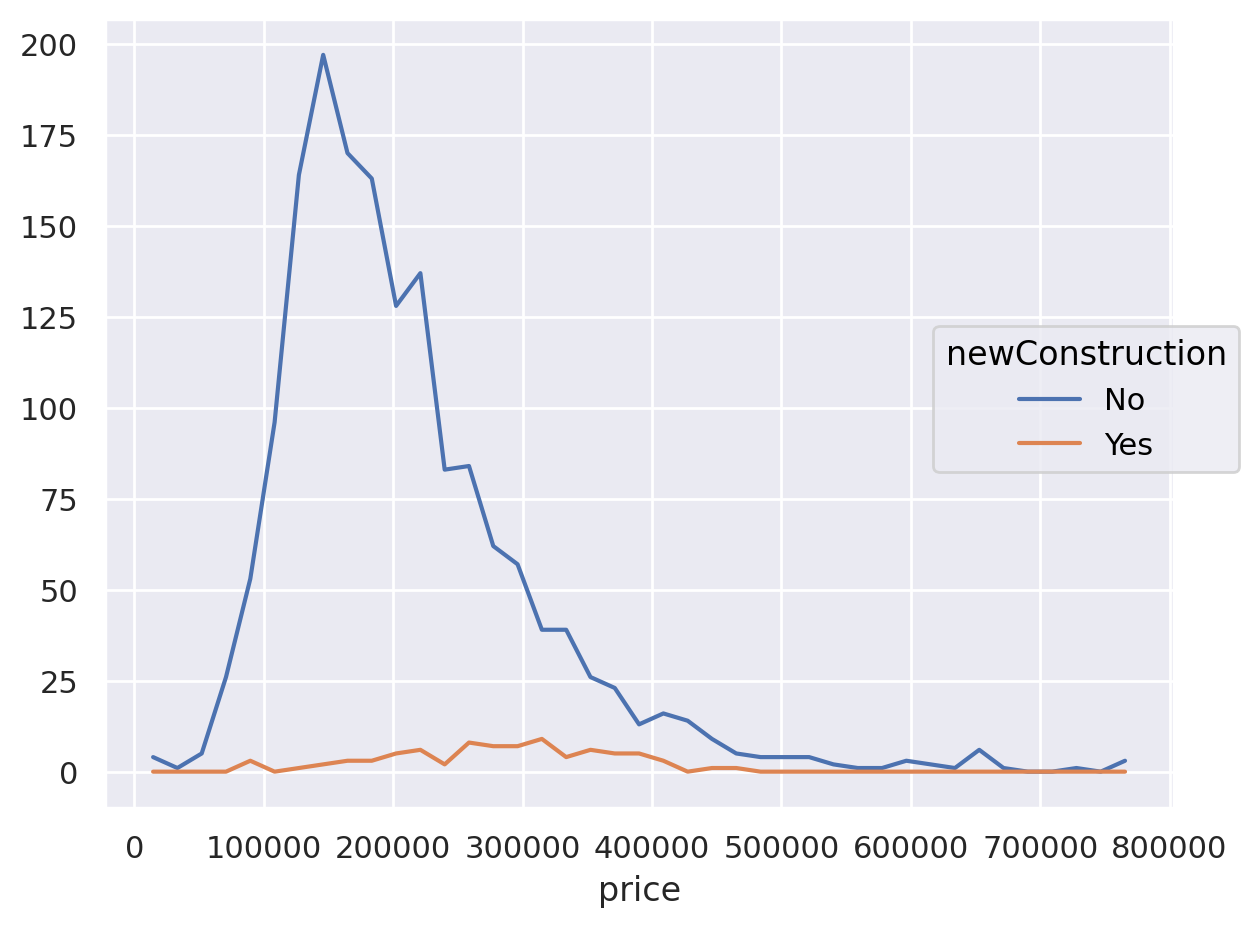

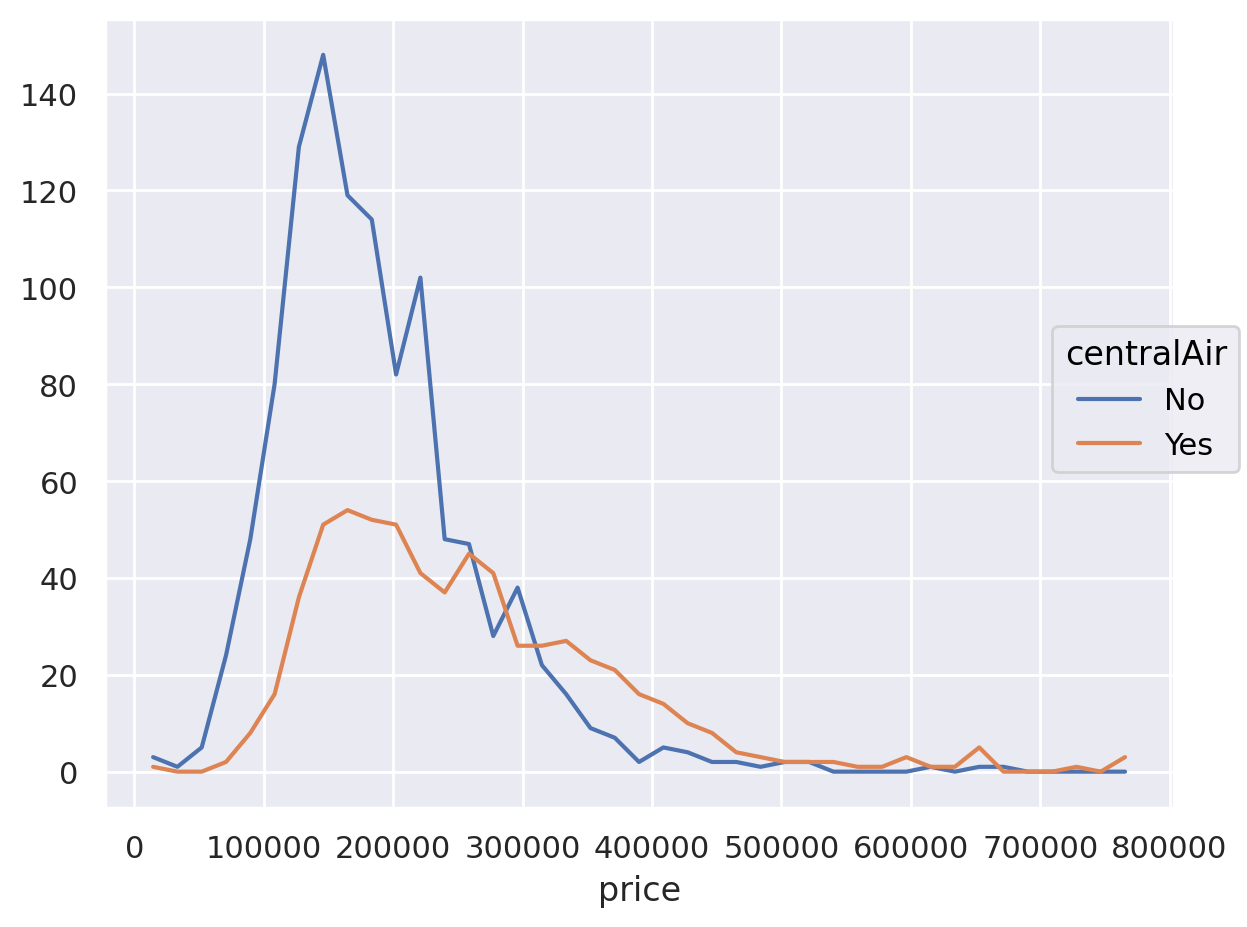

In [69]:
# Q. categorical 변수과 가격(price)는 어떤 관계가 있는가?
categorical_list = ['bedrooms', 'fireplaces', 'bathrooms', 'rooms', 'heating', 'fuel', 'sewer', 'waterfront', 'newConstruction', 'centralAir']

for categorical in categorical_list:
    (
    so.Plot(houses, x="price", color=categorical)
    .add(so.Line(), so.Hist())
    ).show()

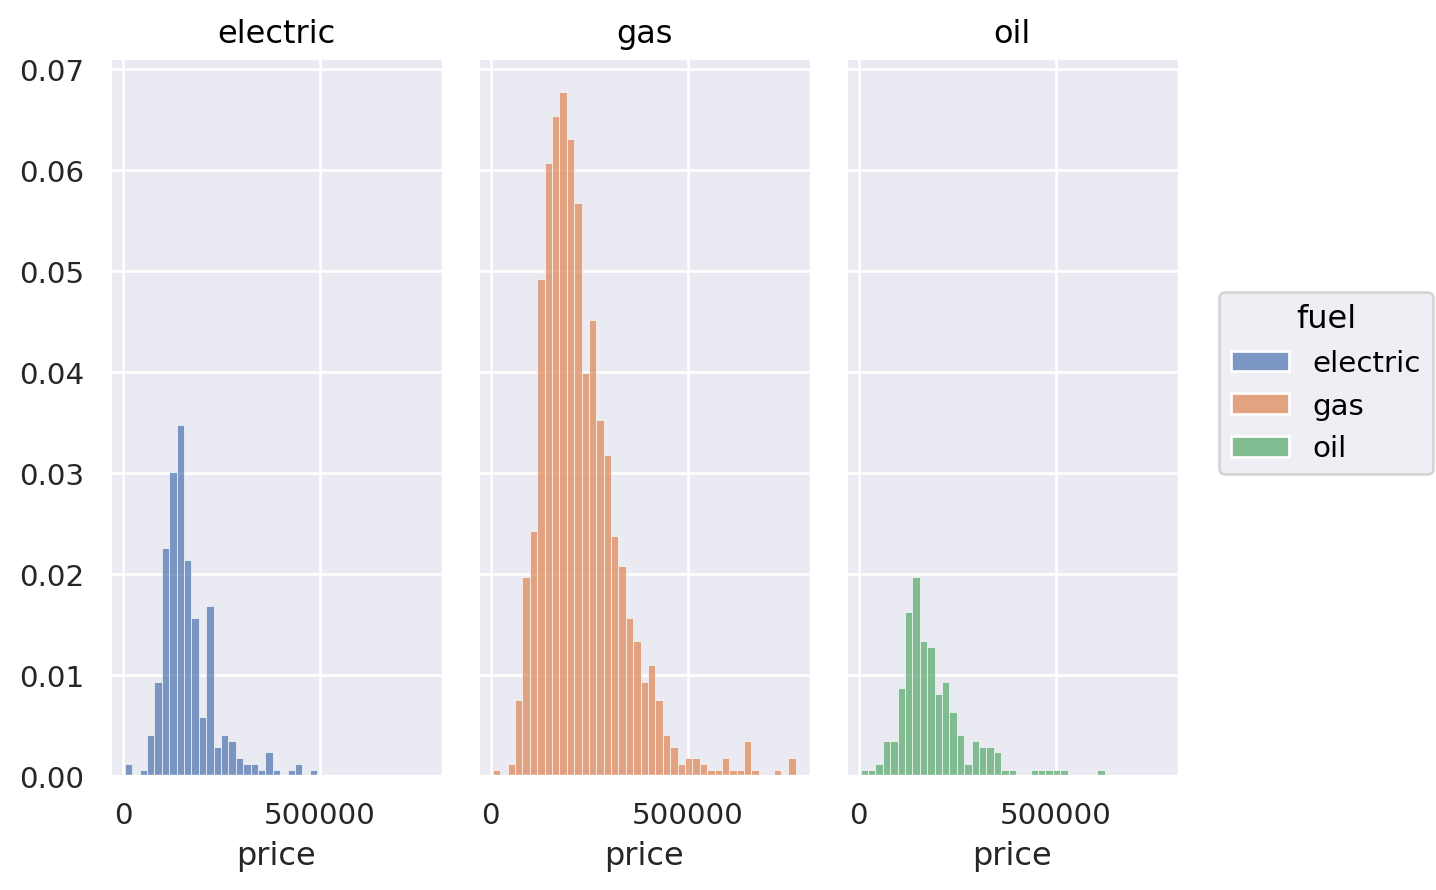

In [70]:
(
    so.Plot(houses, x="price", color="fuel")
    .add(so.Bars(), so.Hist(stat="proportion", common_norm=True))
    .facet("fuel")
)

<Axes: xlabel='fuel', ylabel='price'>

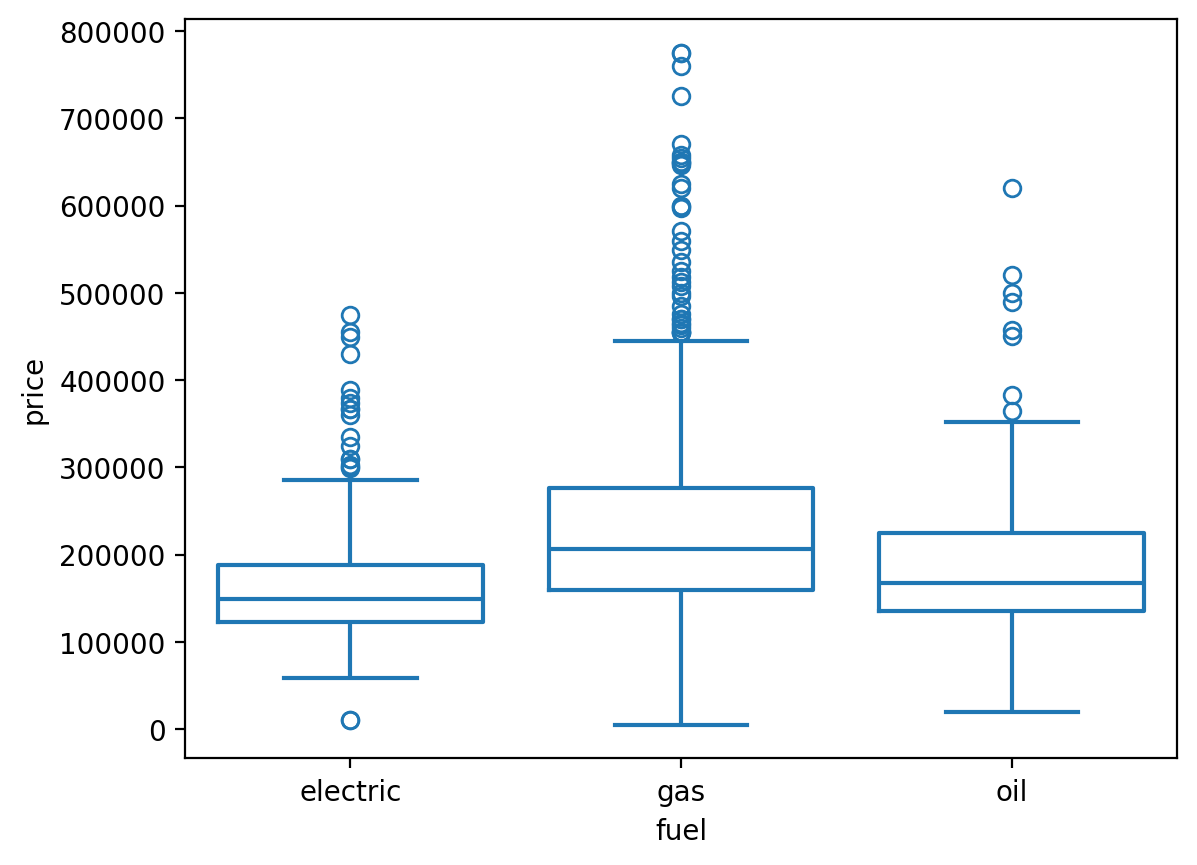

In [71]:
# 난방용 연료(fuel)에서 gas fuel > oil > electric 순으로 평균이 높다.
sns.boxplot(houses, x="fuel", y="price", fill=False)

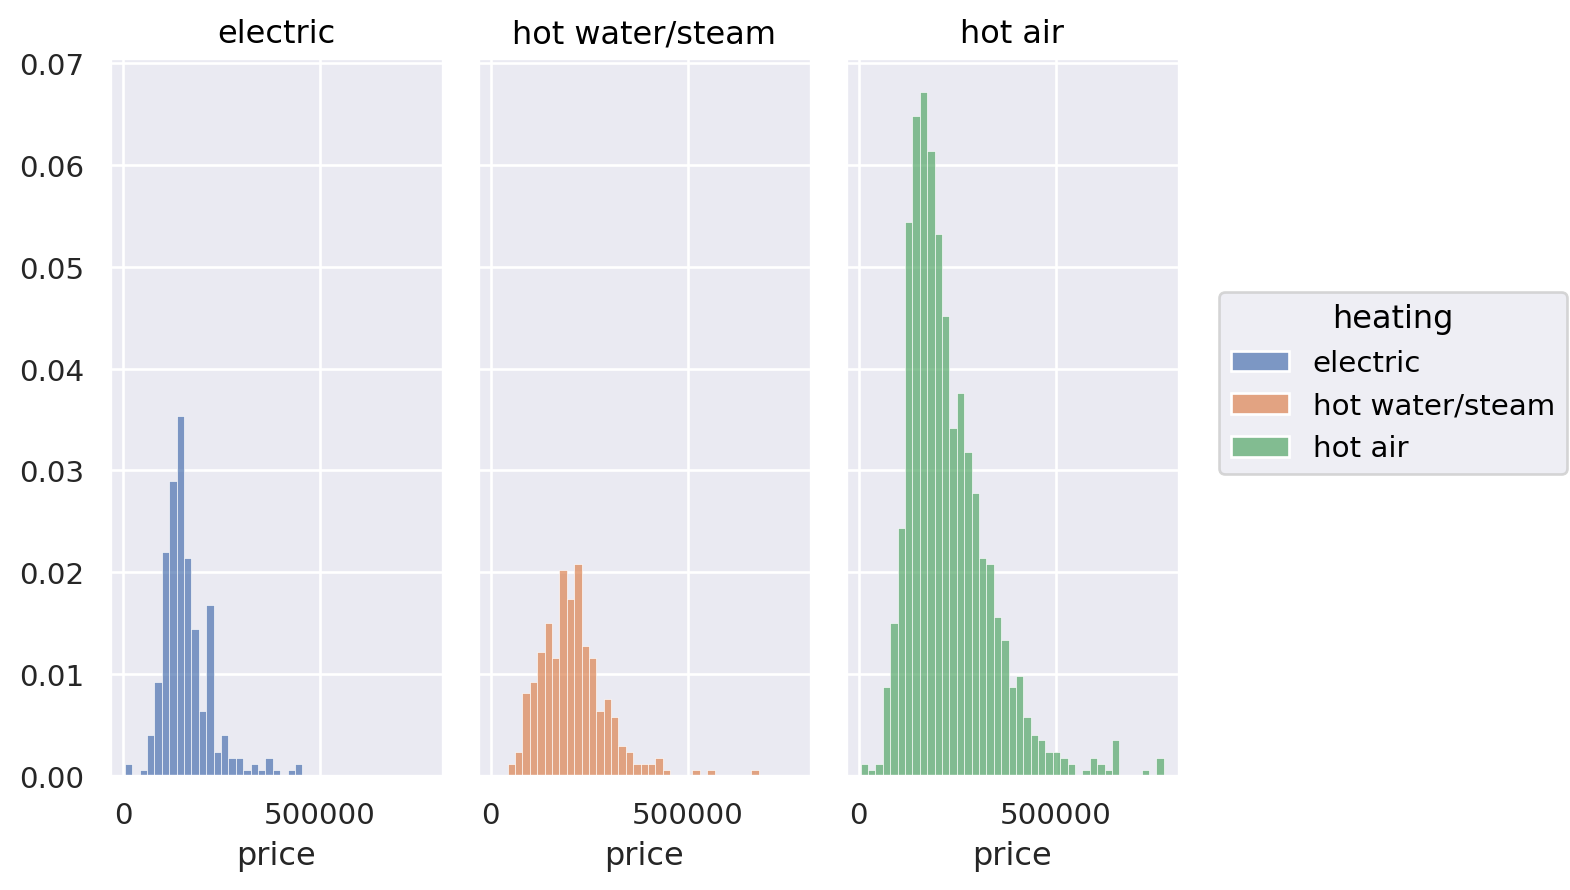

In [72]:
(
    so.Plot(houses, x="price", color="heating")
    .add(so.Bars(), so.Hist(stat="proportion", common_norm=True))
    .facet("heating")
)

<Axes: xlabel='heating', ylabel='price'>

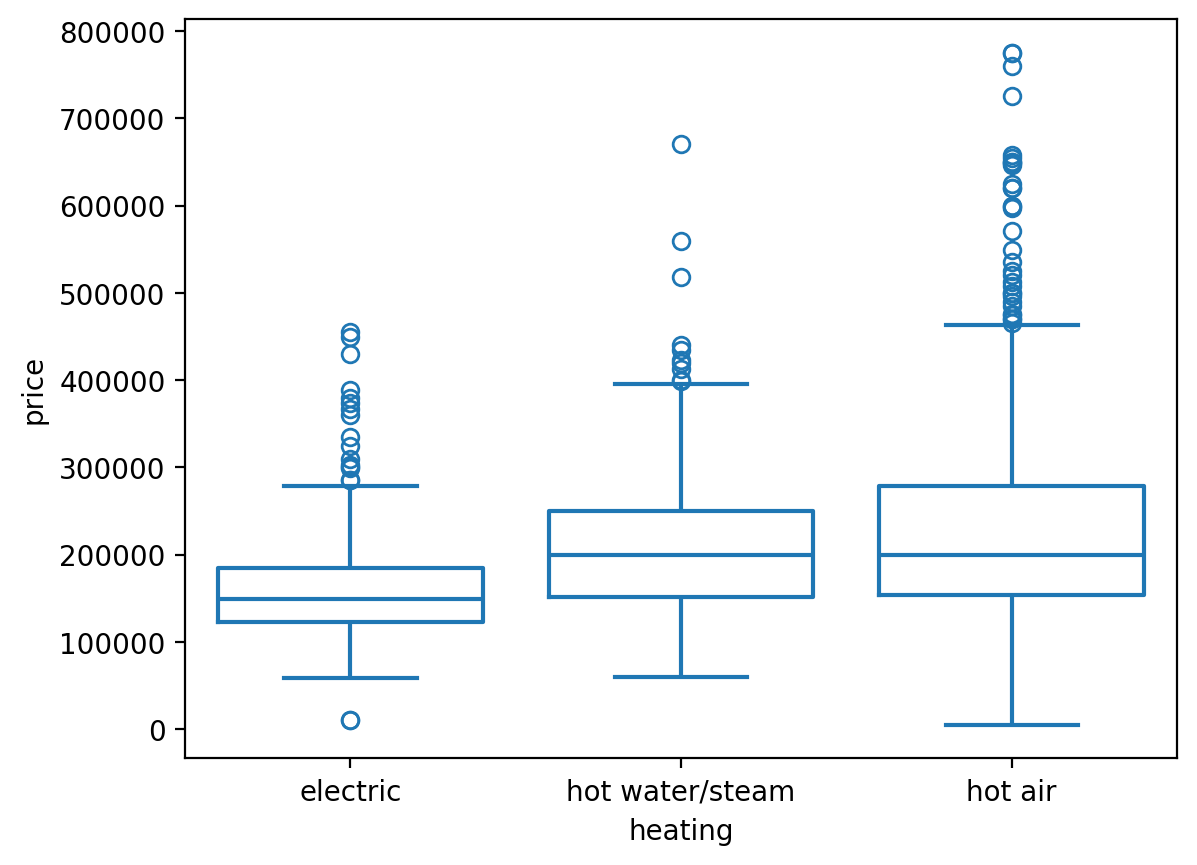

In [73]:
sns.boxplot(houses, x="heating", y="price", fill=False)

In [74]:
houses.groupby('heating')['price'].mean()

heating
electric          161888.63
hot air           226355.43
hot water/steam   209132.46
Name: price, dtype: float64

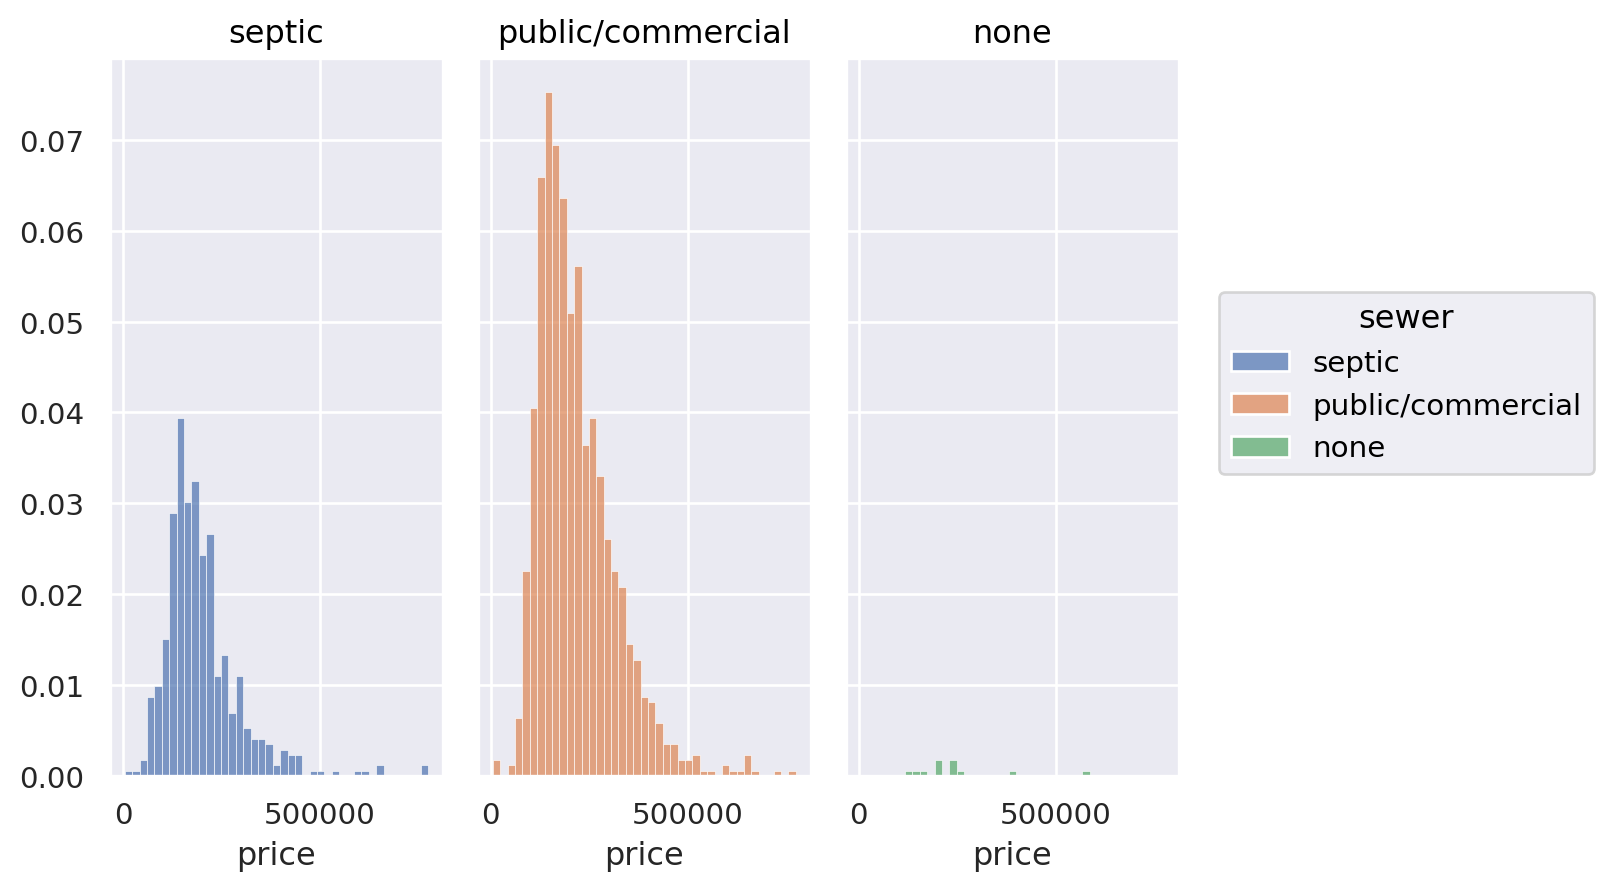

In [75]:
(
    so.Plot(houses, x="price", color="sewer")
    .add(so.Bars(), so.Hist(stat="proportion", common_norm=True))
    .facet("sewer")
)

<Axes: xlabel='sewer', ylabel='price'>

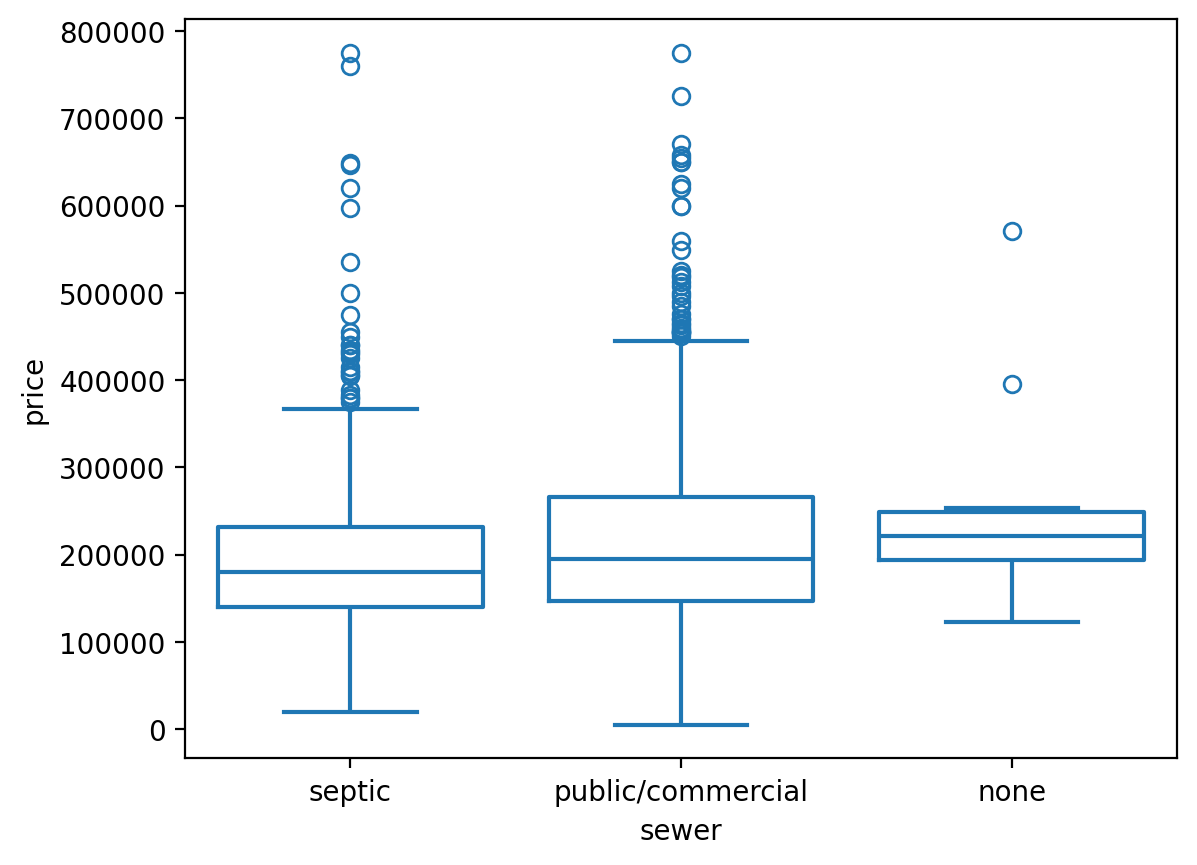

In [76]:
sns.boxplot(houses, x="sewer", y="price", fill=False)

In [77]:
houses.groupby('sewer')['price'].mean()

sewer
none                250952.33
public/commercial   216425.62
septic              200283.82
Name: price, dtype: float64

In [78]:
houses[houses['sewer'] == 'none']['price']

9       122900
17      253750
36      209900
         ...  
1017    211000
1180    171000
1253    571000
Name: price, Length: 12, dtype: int64

## Q. 서로 관계가 있는 Categorical variable은 무엇이 있는가? (Two Categorical variable)
### A. 크게 보이는 범주형 변수들간의 관계는 보이지 않음.

In [79]:
fuel_heating = houses.groupby(["fuel", "heating"]).size().reset_index(name="n")
fuel_heating

,fuel,heating,n
0,electric,electric,298
1,electric,hot air,16
2,electric,hot water/steam,1
...,...,...,...
6,oil,electric,1
7,oil,hot air,144
8,oil,hot water/steam,71


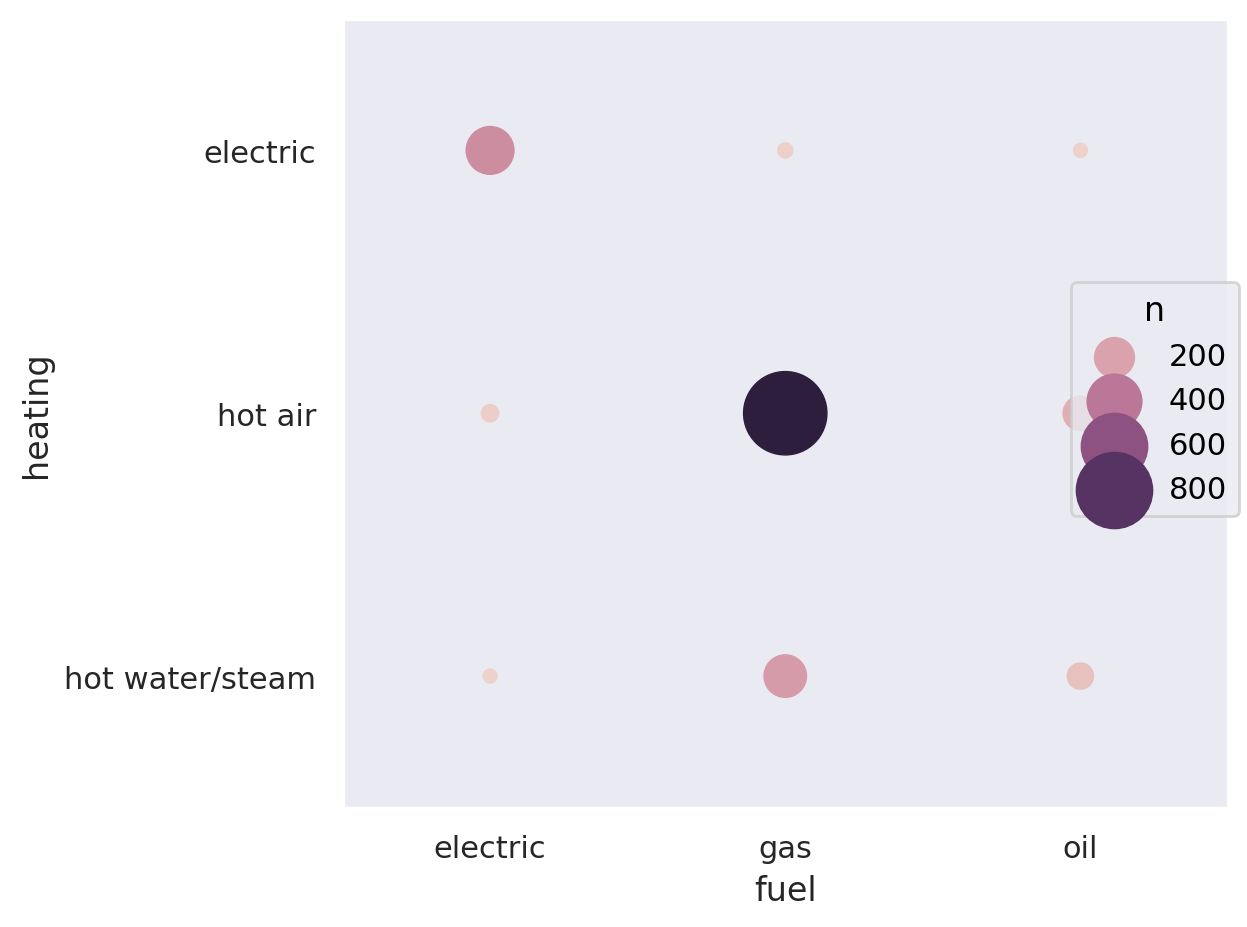

In [80]:
(
    so.Plot(fuel_heating, x="fuel", y="heating", pointsize="n", color="n")
    .add(so.Dot())
    .scale(pointsize=(5, 30))
).show()

In [81]:
fuel_sewer = houses.groupby(["fuel", "sewer"]).size().reset_index(name="n")
fuel_sewer

,fuel,sewer,n
0,electric,none,1
1,electric,public/commercial,230
2,electric,septic,84
...,...,...,...
6,oil,none,2
7,oil,public/commercial,46
8,oil,septic,168


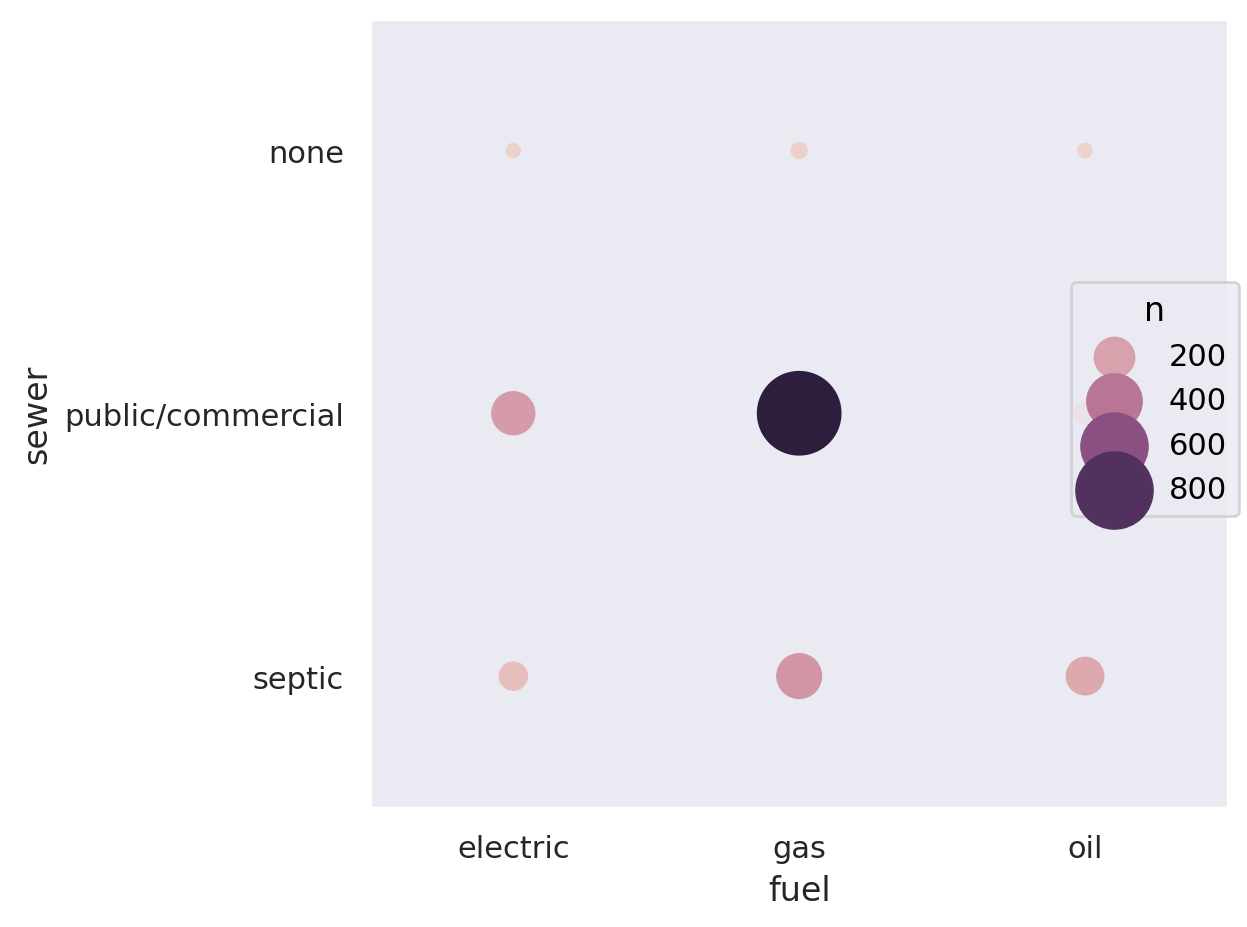

In [82]:
(
    so.Plot(fuel_sewer, x="fuel", y="sewer", pointsize="n", color="n")
    .add(so.Dot())
    .scale(pointsize=(5, 30))
).show()

In [83]:
rooms = houses.groupby(["rooms", "bathrooms"]).size().reset_index(name="n")
rooms

,rooms,bathrooms,n
0,2,1.00,2
1,3,1.00,30
2,3,1.50,34
...,...,...,...
55,12,3.50,18
56,12,4.00,7
57,12,4.50,1


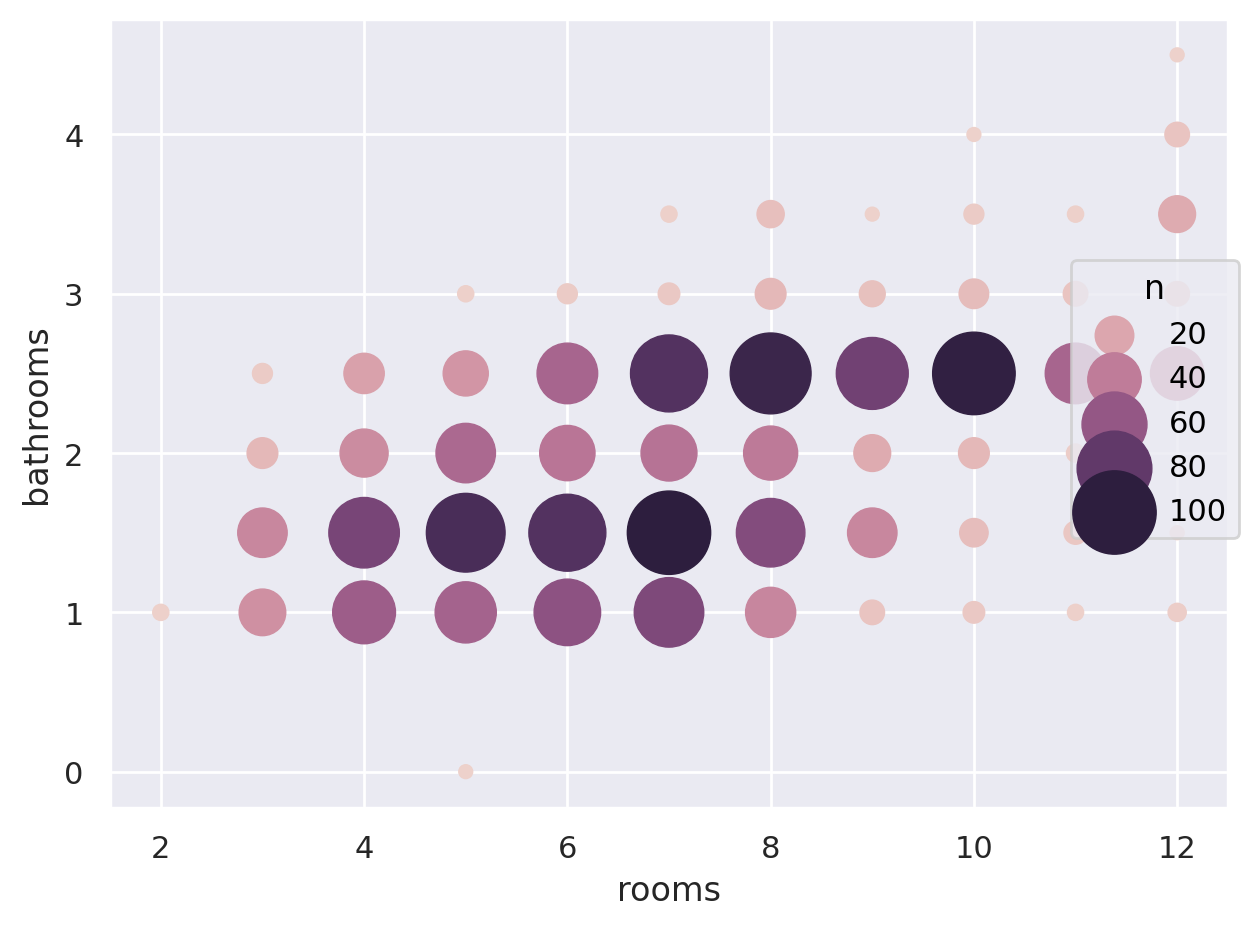

In [84]:
(
    so.Plot(rooms, x="rooms", y="bathrooms", pointsize="n", color="n")
    .add(so.Dot())
    .scale(pointsize=(5, 30))
).show()

## 집 값에 가장 크게 영향을 주는 Continuous variable은? (Two Continuous variable)
### A. livingArea가 가장 관계가 깊고, 선형 관계를 가지고 있다.

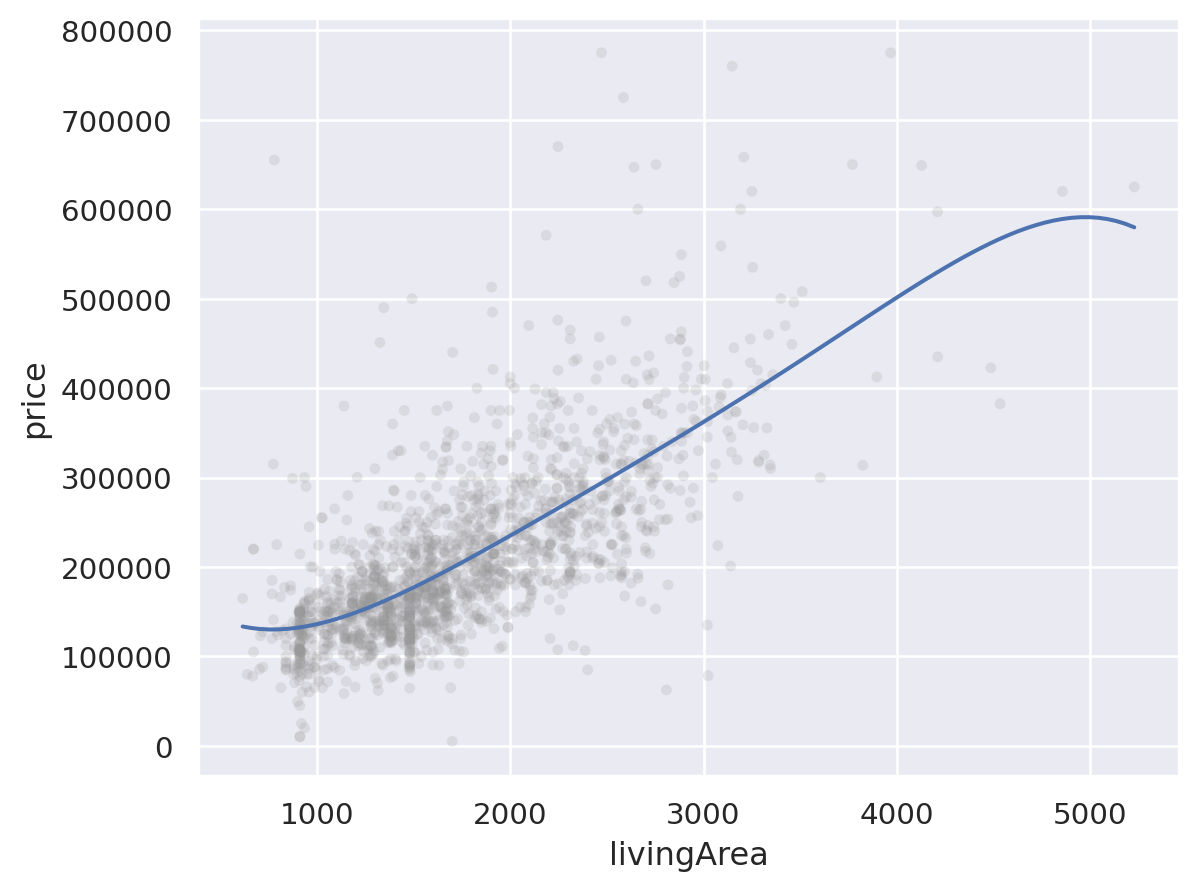

In [85]:
(
    so.Plot(houses, x="livingArea", y="price")
    .add(so.Dots(alpha=1/100, color=".6"))
    .add(so.Line(), so.PolyFit(5))
)

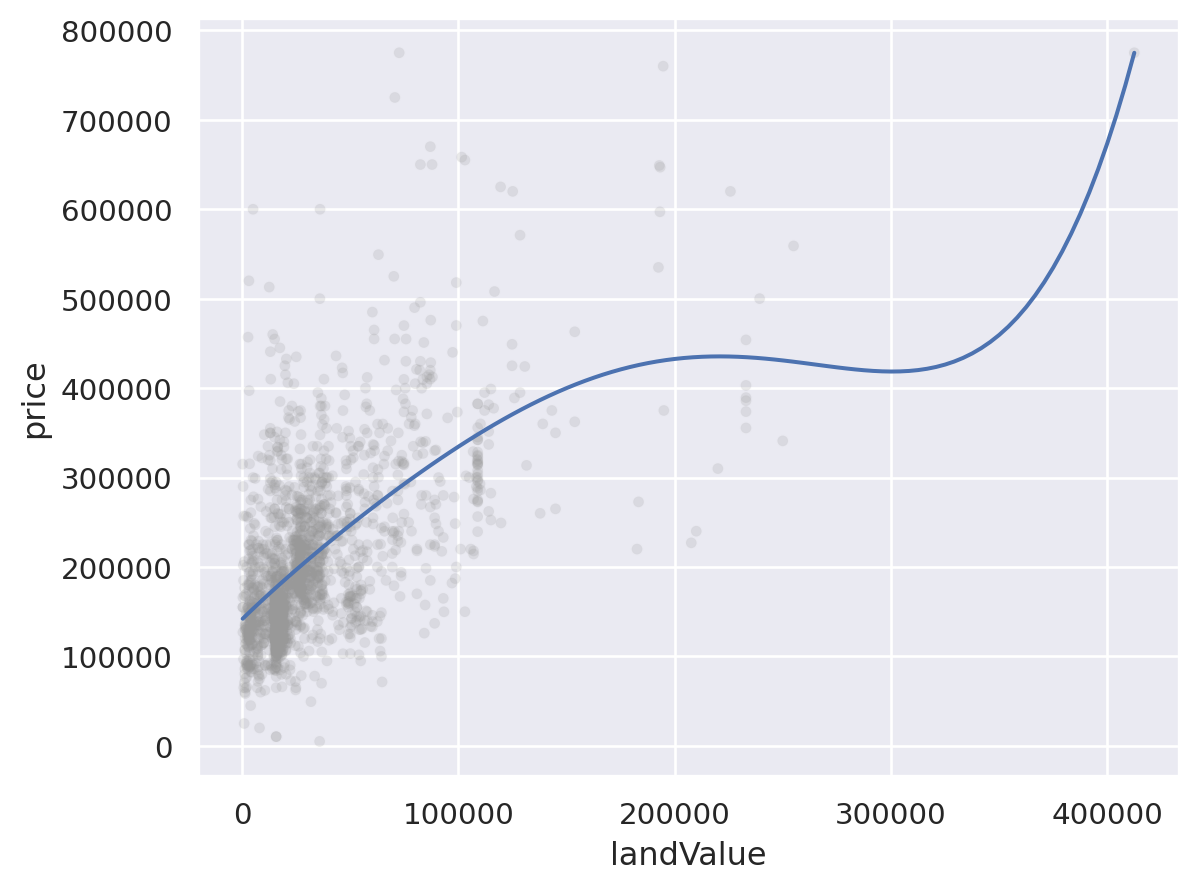

In [86]:
(
    so.Plot(houses, x="landValue", y="price")
    .add(so.Dots(alpha=1/100, color=".6"))
    .add(so.Line(), so.PolyFit(5))
)

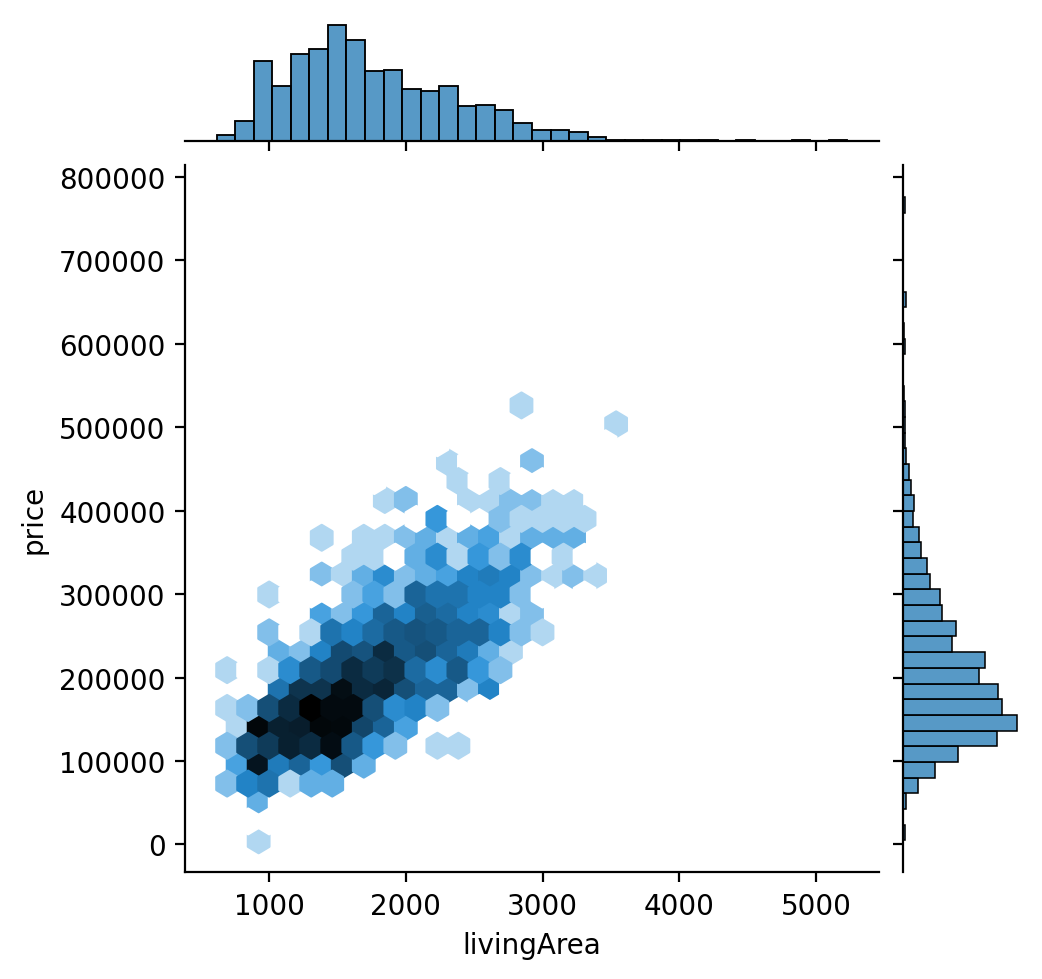

In [87]:
from matplotlib.colors import LogNorm

sns.jointplot(houses, x="livingArea", y="price", kind="hex", gridsize=30, height=5, norm=LogNorm())  # gridsize: bin 개수
plt.show()